#### Business Understanding
#### Data Understanding
#### Data Preparation
#### Evaluation - Question 1: General Earthquake Count Development
#### Evaluation - Question 2a: Relationship between an Earthquakes Magnitude and its Damage
#### Evaluation - Question 2b: Earthquake Development of Severe Earthquakes 
#### Evaluation - Question 3: Distribution of Earthquakes

### Project: Analyse Earthquake development trends over time

#### Business Understanding
When watching the news and talking to people, one can get the impression that there are an increasing number of Earthquakes.
To analyse this further, I found a data set that might help to answer this question. It is from the National Centre of Environmental Information  NCEI — https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/search.
I also found an existing easier access file: 
https://www.qgistutorials.com/de/docs/importing_spreadsheets_csv.html => signif.txt

While trying to find a fitting data set and while checking on data sets, I read some additional information on earthquakes, to get a little bit better understanding for some of the aspects of the data, like the magnitude of an earthquake.



### Data Understanding
#### Read in the file

For the .csv file, I took the text file and opened it in Excel.
There, I had to strip a column, because it contained commas and semicolons. From Excel, the file was then saved as a .csv file.

In [503]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from IPython import display
%matplotlib inline

# data gathering
df = pd.read_csv('./significant-hist-earthquakes.csv', sep=';')

df.head()
#df.tail()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,1,NaN,-2150,NaN,NaN,NaN,NaN,,NaN,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,-2000,NaN,NaN,NaN,NaN,NaN,18.0,7.1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,2,Tsu,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5877,Tsu,-1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,8,NaN,-1566,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [504]:
#get the number of rows and columns in the data set
df.shape

(6105, 46)

In [505]:
#get the number of different values for each column. 
#Note: NaN is not counted as a distinct value here
print(df.nunique())

I_D                                   6105
FLAG_TSUNAMI                             1
YEAR                                   947
MONTH                                   12
DAY                                     31
HOUR                                    24
MINUTE                                  60
SECOND                                 576
FOCAL_DEPTH                            198
EQ_PRIMARY                              64
EQ_MAG_MW                               54
EQ_MAG_MS                               55
EQ_MAG_MB                               47
EQ_MAG_ML                               48
EQ_MAG_MFA                              14
EQ_MAG_UNK                              52
INTENSITY                               11
COUNTRY                                155
STATE                                   29
LATITUDE                              2921
LONGITUDE                             3693
REGION_CODE                             18
DEATHS                                 416
DEATHS_DESC

### Data Preparation

#### Create two new columns for more x-axis possibilities on timeline analyses: 
* Decade   (Year // 10) and 
* Century  (Year // 100)

In [506]:
decade = []
century = []
for val in df['YEAR']:
    try:
        deca= int(val//10)
        century.append(deca//10)
        decade.append(deca)
    except Exception:
        century.append(np.NaN)
        decade.append(np.NaN)

 
decade = pd.Series(decade)
century = pd.Series(century)

df['DECADE'] = decade
df['CENTURY'] = century
print(df.shape) 

(6105, 48)


### Data Preparation

To be able to better explore and analyze the data, I created two additional data columns:

#### Tsunami
Tsunami is 1, where "Flag_Tsunami" is "Tsu". If "Flag_Tsunami" is not "Tsu", it is a NaN.

#### Severe
I created a new column "Severe" to experiment with.
So in case the dataset is either a tsunami, or has a magnitude of more than 5.5, or a damage of more than one: Set "severe" to 2. If the magnitude is greater than 4.5 and the damage equals 1: Set "severe" to 1.
Otherwise - so no associated tsunami, magnitude less than or equal to 4.5 and a damage indicator of 0: Set "severe" to 0.



In [507]:
tsunami = []

for val in df['FLAG_TSUNAMI']:
    if val == 'Tsu':
        tsunami.append(1)
    else:
        tsunami.append(0)

 
tsunami = pd.Series(tsunami)

df['TSUNAMI'] = tsunami
print(df.shape) 

(6105, 49)


In [425]:
print(df['TSUNAMI'])

0       0
1       0
2       1
3       1
4       0
       ..
6100    0
6101    1
6102    0
6103    0
6104    0
Name: TSUNAMI, Length: 6105, dtype: int64


In [508]:
severe = []

for tsu, eq, dam in zip(df['TSUNAMI'], df['EQ_PRIMARY'], df['DAMAGE_DESCRIPTION']):
    if tsu == 1 or eq > 5.5 or dam > 1:
        severe.append(2)
    elif eq > 4.5 or dam == 1:
        severe.append(1)
    else:
        severe.append(0)

 
severe = pd.Series(severe)

df['SEVERE'] = severe
print(df.shape) 

(6105, 50)


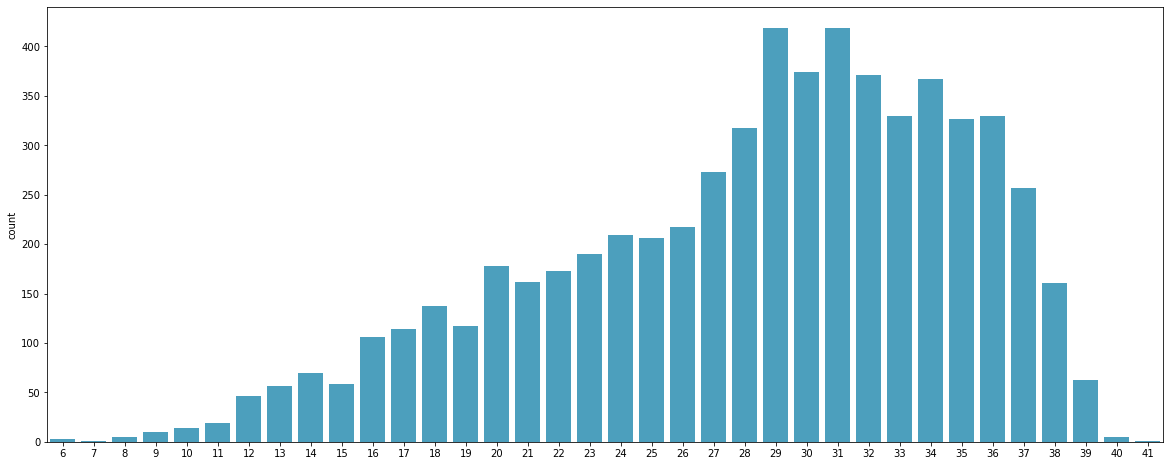

In [501]:
# check the distribution of the number of empty fields per column
df_nan_col_sum = df.isna().sum(axis=1)
plt.figure(figsize=[20, 8])
ax = sns.countplot(x=df_nan_col_sum, color = sns.color_palette("husl", 8)[5])
ax.set_xticklabels(ax.get_xticklabels());

In [523]:
# get column sets
more_missing_cols = set(df.columns[df.isnull().mean() >= 0.30])
print(more_missing_cols)

thirty_missing_cols = set(df.columns[df.isnull().mean() < 0.30])
print(thirty_missing_cols)


half_missing_cols = set(df.columns[df.isnull().mean() < 0.50])
print(half_missing_cols)


onepct_missing_cols = set(df.columns[df.isnull().mean() < 0.01])
print(onepct_missing_cols)

ninetyninepct_missing_cols = set(df.columns[df.isnull().mean() >= 0.01])
print(ninetyninepct_missing_cols)

{'DEATHS_DESCRIPTION', 'FOCAL_DEPTH', 'TOTAL_HOUSES_DAMAGED_DESCRIPTION', 'INTENSITY', 'MISSING', 'TOTAL_HOUSES_DESTROYED_DESCRIPTION', 'HOUR', 'TOTAL_MISSING', 'HOUSES_DESTROYED_DESCRIPTION', 'DAMAGE_MILLIONS_DOLLARS', 'EQ_MAG_MW', 'EQ_MAG_MFA', 'HOUSES_DAMAGED_DESCRIPTION', 'MINUTE', 'DEATHS', 'EQ_MAG_MS', 'HOUSES_DESTROYED', 'EQ_MAG_MB', 'EQ_MAG_UNK', 'TOTAL_HOUSES_DAMAGED', 'TOTAL_INJURIES_DESCRIPTION', 'HOUSES_DAMAGED', 'TOTAL_INJURIES', 'STATE', 'TOTAL_DEATHS', 'TOTAL_DAMAGE_MILLIONS_DOLLARS', 'INJURIES_DESCRIPTION', 'TOTAL_MISSING_DESCRIPTION', 'TOTAL_DAMAGE_DESCRIPTION', 'SECOND', 'TOTAL_DEATHS_DESCRIPTION', 'FLAG_TSUNAMI', 'EQ_MAG_ML', 'INJURIES', 'TOTAL_HOUSES_DESTROYED', 'MISSING_DESCRIPTION'}
{'CENTURY', 'MONTH', 'DECADE', 'I_D', 'COUNTRY', 'LATITUDE', 'TSUNAMI', 'LONGITUDE', 'SEVERE', 'YEAR', 'DAY', 'EQ_PRIMARY', 'DAMAGE_DESCRIPTION', 'REGION_CODE'}
{'FOCAL_DEPTH', 'COUNTRY', 'LATITUDE', 'TSUNAMI', 'HOUR', 'REGION_CODE', 'DECADE', 'I_D', 'MINUTE', 'LONGITUDE', 'DAY', 'EQ_P

* Focal Depth (km) - The depth of the earthquake is given in kilometers.
* EQ primary - Magnitude of the Earthquake
* Damage Description - Description of Damage from the Earthquake. Valid values: 0 to 4
For those events not offering a monetary evaluation of damage, the following five-level scale was used to classify damage (1990 dollars) and was listed in the Damage column. If the actual dollar amount of damage was listed, a descriptor was also added for search purposes.
0	NONE
1	LIMITED (roughly corresponding to less than $1 million)
2	MODERATE (~$1 to $5 million)
3	SEVERE (~$5 to $25 million)
4	EXTREME (~$25 million or more) 
When possible, a rough estimate was made of the dollar amount of damage based upon the description provided, in order to choose the damage category. In many cases, only a single descriptive term was available. These terms were converted to the damage categories based upon the authors apparent use of the term elsewhere. In the absence of other information, LIMITED is considered synonymous with slight, minor, and light, SEVERE as synonymous with major, extensive, and heavy, and EXTREME as synonymous with catastrophic.
Note: The descriptive terms relate approximately to current dollar values.

Decision:
* Drop all columns except thirty_missing_cols
* Drop all rows with NaNs in thirty_missing cols

In [428]:
df_less_cols = df.drop(more_missing_cols, axis=1).copy()
df_less_cols = df_less_cols.drop(['I_D', 'DAY' ], axis=1).copy()

print(df_less_cols)

      YEAR  MONTH  EQ_PRIMARY           COUNTRY LATITUDE LONGITUDE  \
0    -2150    NaN         7.3            JORDAN   31.100    35.500   
1    -2000    NaN         7.1      TURKMENISTAN   38.000    58.200   
2    -2000    NaN         NaN             SYRIA   35.683    35.800   
3    -1610    NaN         NaN            GREECE   36.400    25.400   
4    -1566    NaN         NaN            ISRAEL   31.500    35.300   
...    ...    ...         ...               ...      ...       ...   
6100  2019    5.0         7.2  PAPUA NEW GUINEA   -6.977   146.440   
6101  2019    5.0         7.5  PAPUA NEW GUINEA   -4.081   152.569   
6102  2019    5.0         4.8             CHINA   45.205   124.611   
6103  2019    5.0         3.2       NETHERLANDS   53.394     6.586   
6104  2019    5.0         8.0              PERU   -5.796   -75.298   

      REGION_CODE  DAMAGE_DESCRIPTION  DECADE  CENTURY  TSUNAMI  SEVERE  
0           140.0                 3.0    -215      -22        0       2  
1          

Decision:
* Drop all columns except onepct_missing_cols
* Drop all rows with NaNs in onepct_missing cols

In [429]:
df_lesser_cols = df.drop(ninetyninepct_missing_cols, axis=1).copy()
df_lesser_cols = df_lesser_cols.drop(['I_D'], axis=1).copy()

print(df_lesser_cols)

      YEAR           COUNTRY LATITUDE LONGITUDE  REGION_CODE  DECADE  CENTURY  \
0    -2150            JORDAN   31.100    35.500        140.0    -215      -22   
1    -2000      TURKMENISTAN   38.000    58.200         40.0    -200      -20   
2    -2000             SYRIA   35.683    35.800        130.0    -200      -20   
3    -1610            GREECE   36.400    25.400        130.0    -161      -17   
4    -1566            ISRAEL   31.500    35.300        140.0    -157      -16   
...    ...               ...      ...       ...          ...     ...      ...   
6100  2019  PAPUA NEW GUINEA   -6.977   146.440        170.0     201       20   
6101  2019  PAPUA NEW GUINEA   -4.081   152.569        170.0     201       20   
6102  2019             CHINA   45.205   124.611         30.0     201       20   
6103  2019       NETHERLANDS   53.394     6.586          NaN     201       20   
6104  2019              PERU   -5.796   -75.298        160.0     201       20   

      TSUNAMI  SEVERE  
0  

In [431]:
df_dropped  = df_less_cols.dropna()

In [432]:
print(df_dropped)

      YEAR  MONTH  EQ_PRIMARY           COUNTRY LATITUDE LONGITUDE  \
16    -426    6.0         7.1            GREECE   38.900    22.700   
32    -193    2.0         6.5             CHINA   35.400   103.900   
36     -63   10.0         6.4            RUSSIA   45.200    36.600   
43     -31    9.0         7.0            ISRAEL   32.000    35.500   
57      46   10.0         6.5             CHINA   33.000   112.500   
...    ...    ...         ...               ...      ...       ...   
6099  2019    4.0         6.1       PHILIPPINES   14.924   120.497   
6100  2019    5.0         7.2  PAPUA NEW GUINEA   -6.977   146.440   
6101  2019    5.0         7.5  PAPUA NEW GUINEA   -4.081   152.569   
6102  2019    5.0         4.8             CHINA   45.205   124.611   
6104  2019    5.0         8.0              PERU   -5.796   -75.298   

      REGION_CODE  DAMAGE_DESCRIPTION  DECADE  CENTURY  TSUNAMI  SEVERE  
16          130.0                 3.0     -43       -5        1       2  
32         

### Evaluate the Results
#### Question 1: General Earthquake Count Development




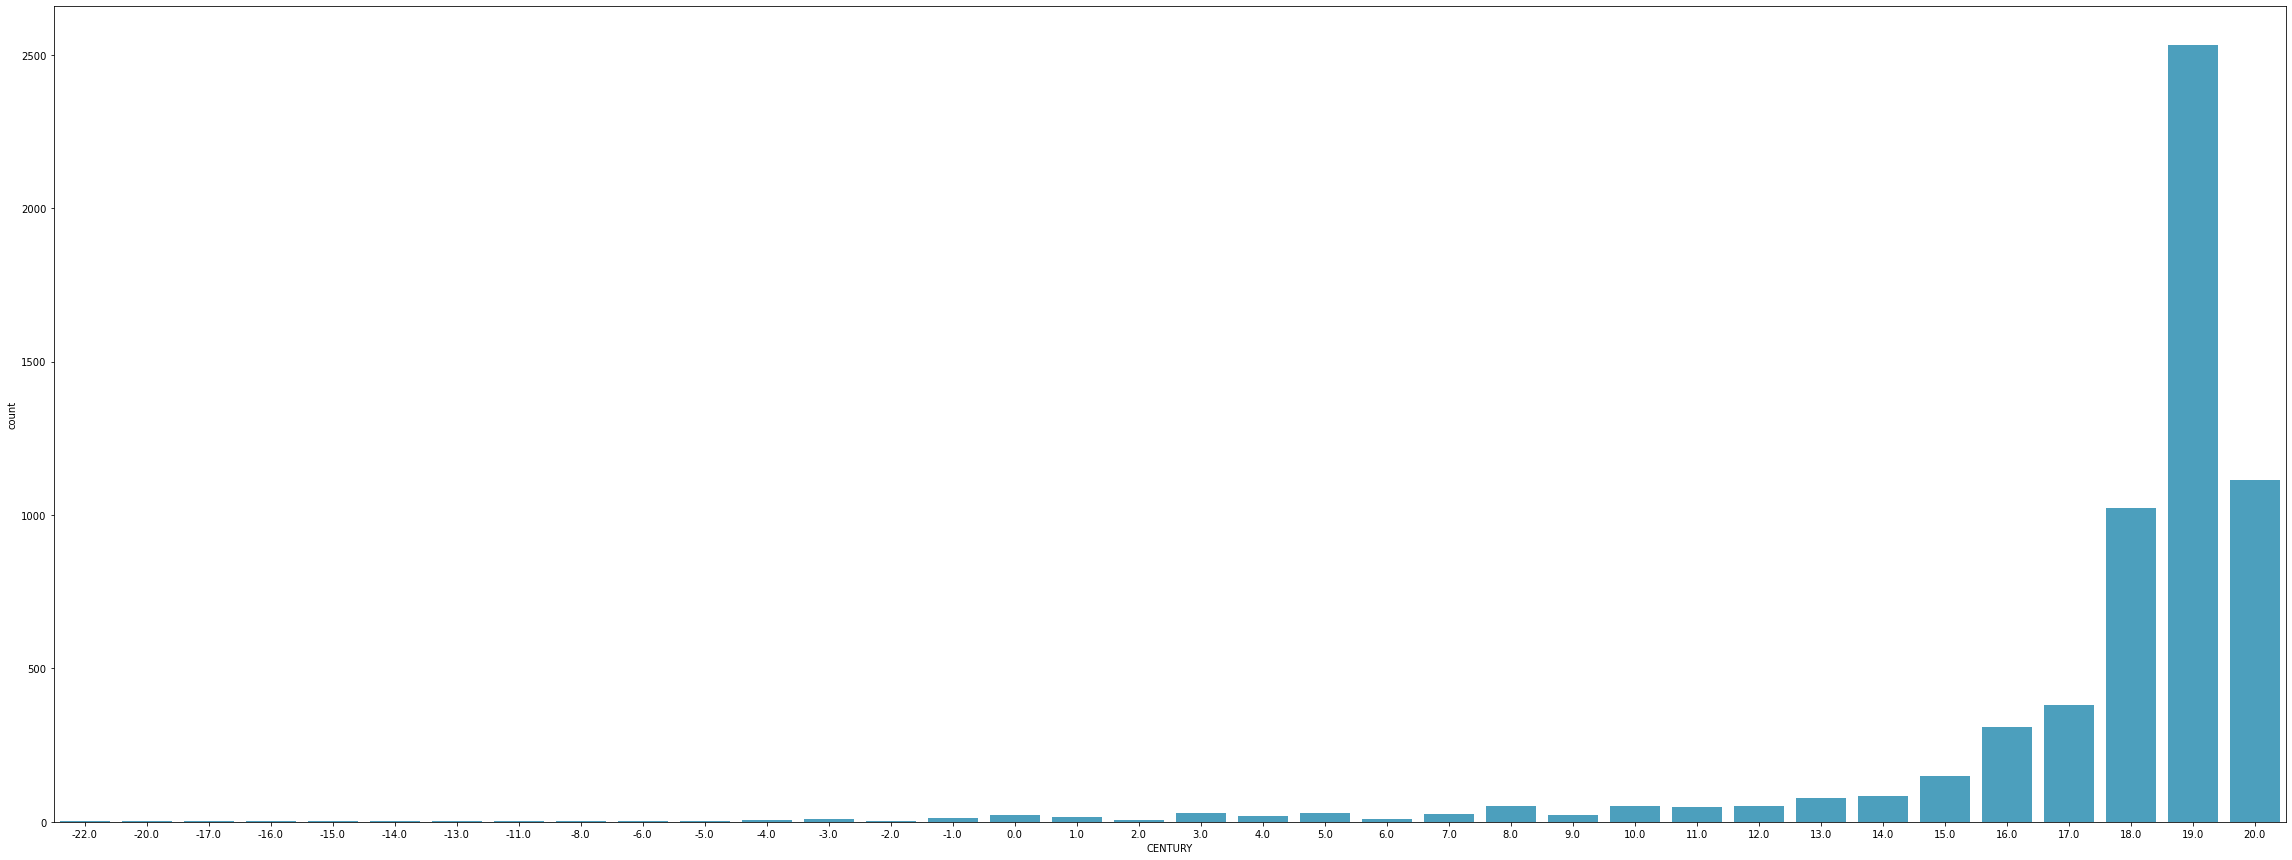

In [210]:
# The general earthquake count development by century - entire data set
plt.figure(figsize=[40,15])
g = sns.countplot(data=df, x="CENTURY", color = sns.color_palette("husl", 8)[5])
#g.set(xlim=(25.0, None))

[(150.0, 215.5)]

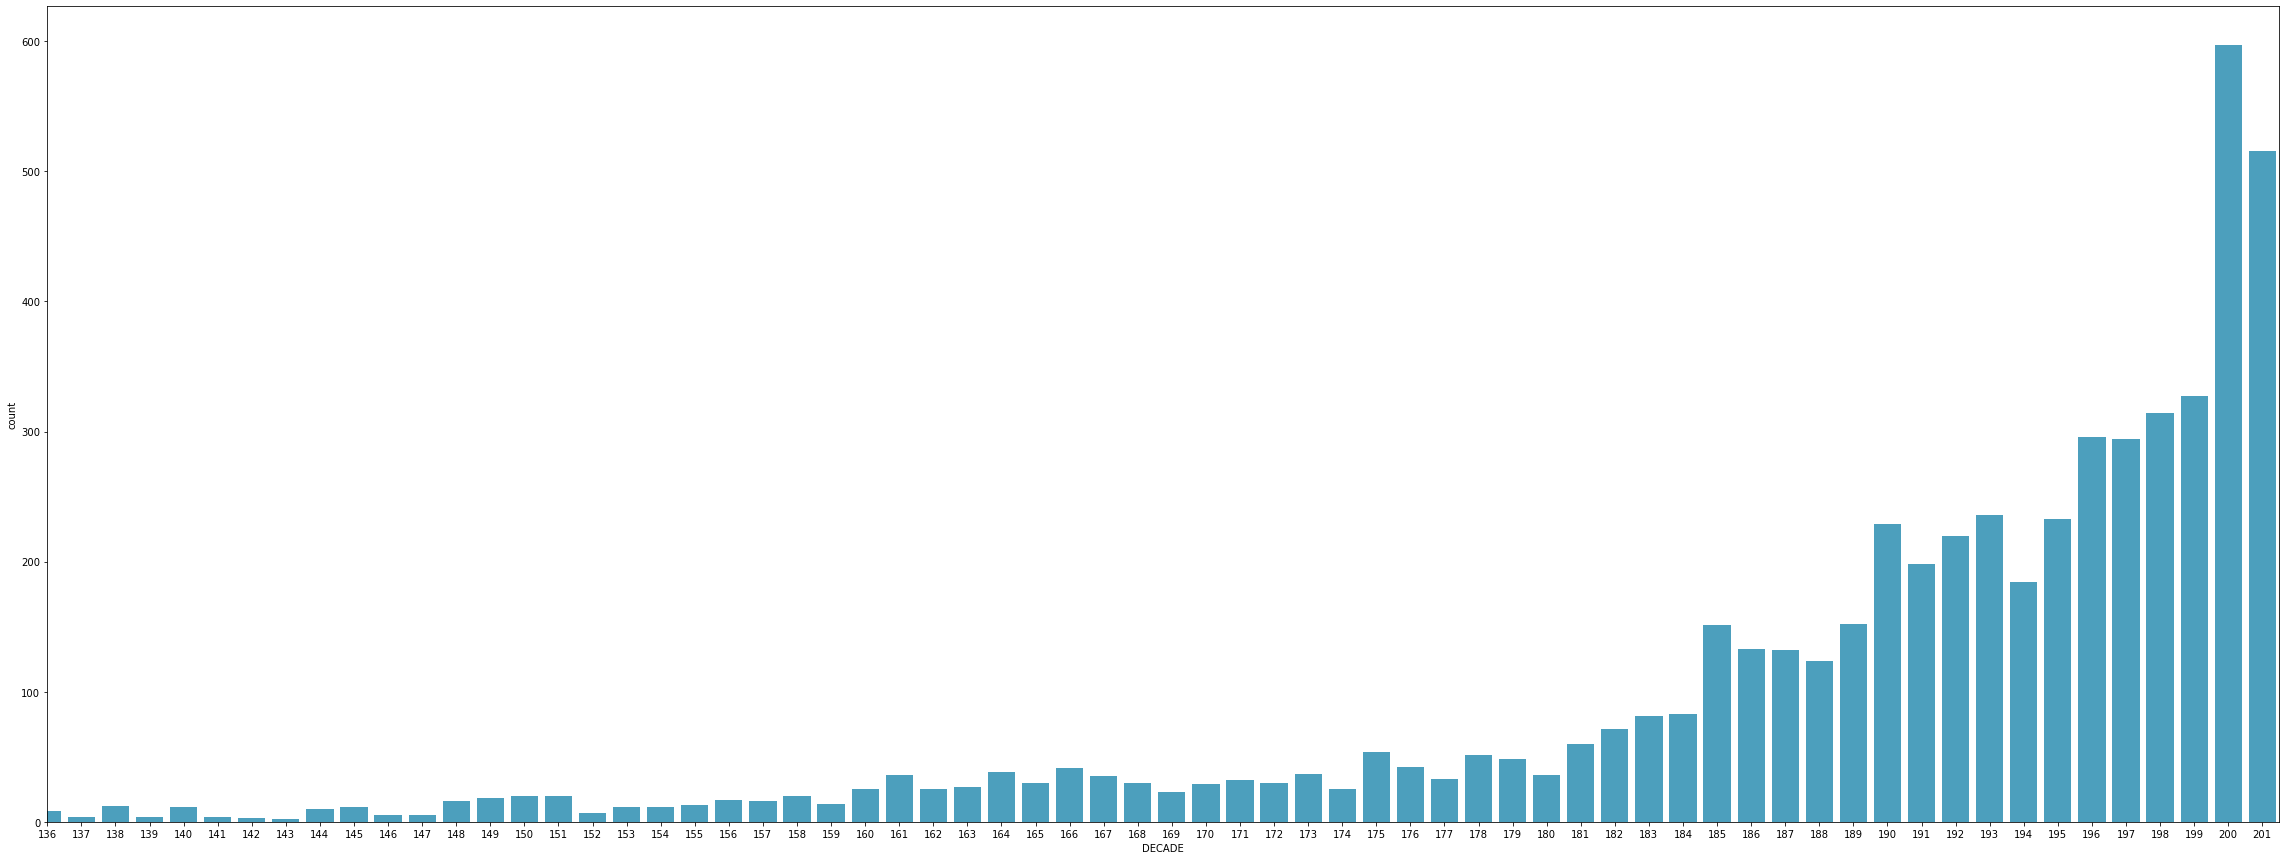

In [512]:
# The general earthquake count development from 1360 by decade 
# On the entire data set
plt.figure(figsize=[40,15])
g = sns.countplot(data=df, x="DECADE", color = sns.color_palette("husl", 8)[5])
g.set(xlim=(150.0, None))

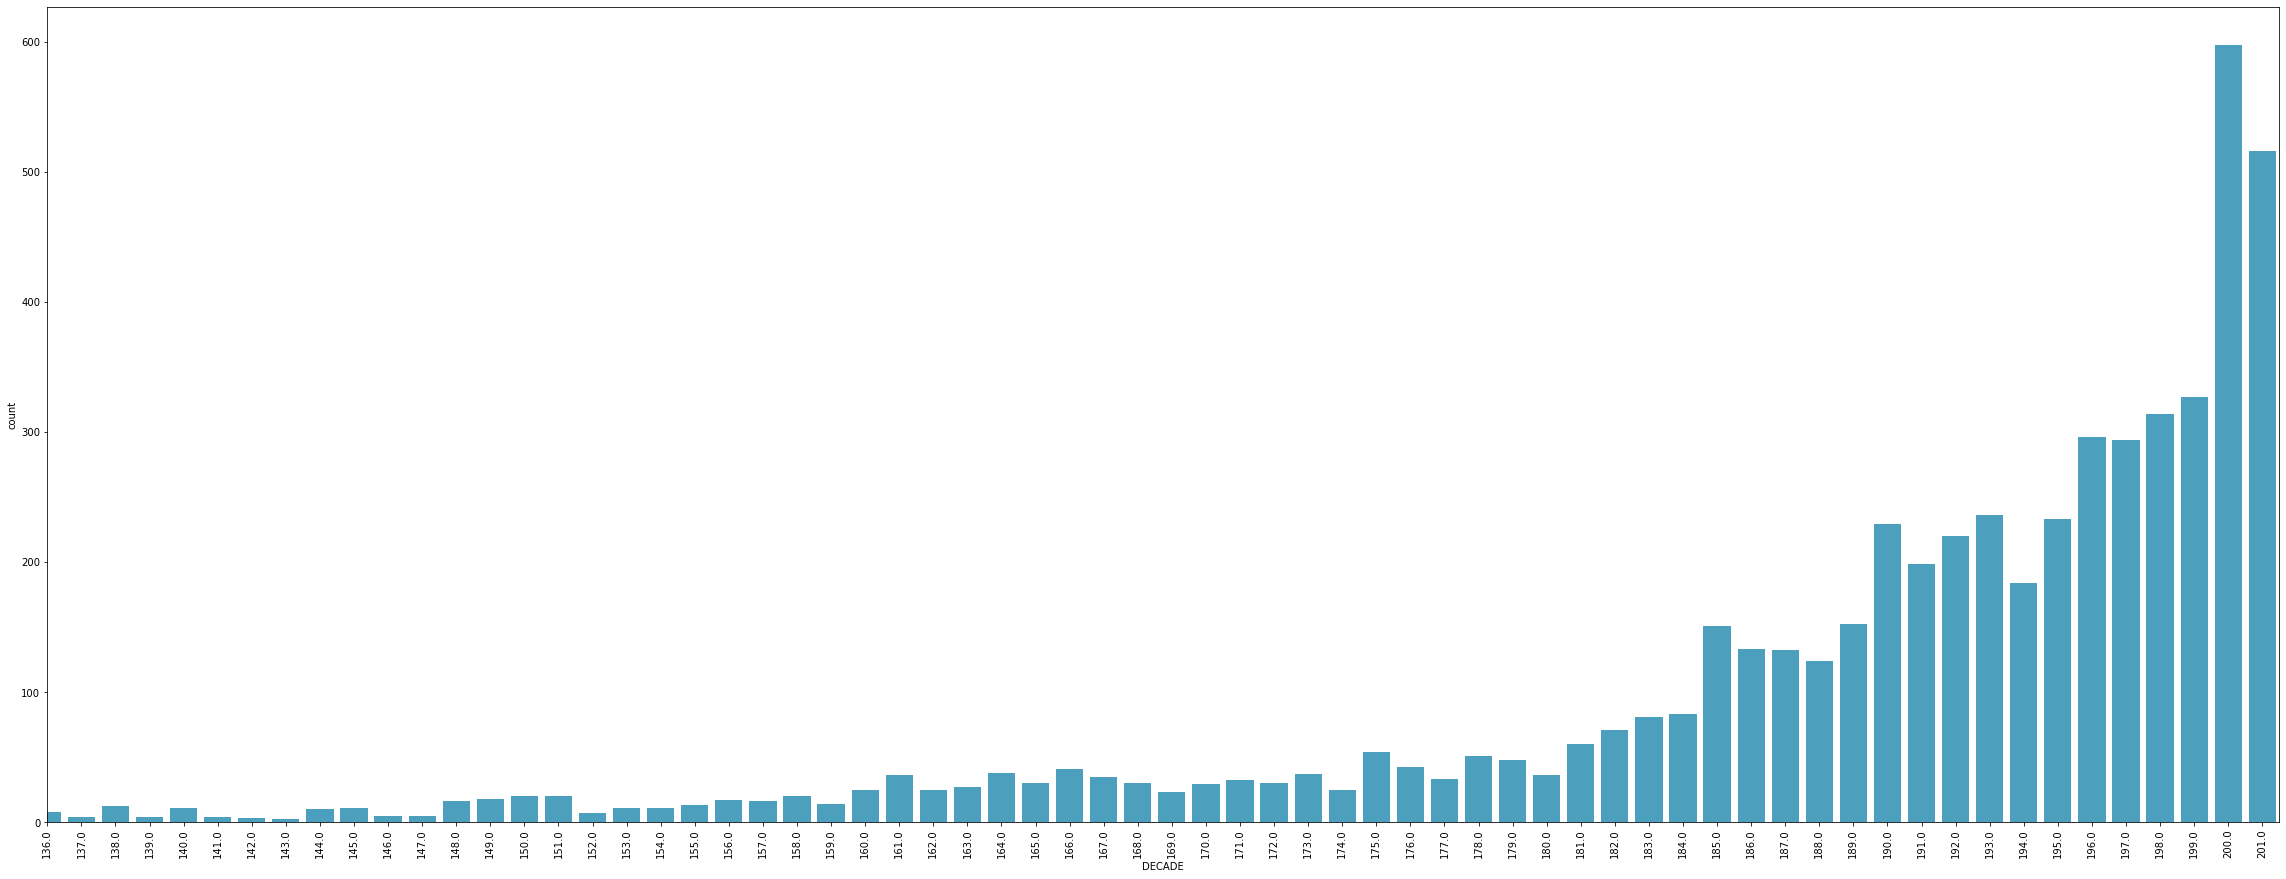

In [217]:
# The general earthquake count development from 1360 by decade 
# On the entire data set
plt.figure(figsize=[40,15])
g = sns.countplot(data=df, x="DECADE", color = sns.color_palette("husl", 8)[5])
g.set(xlim=(150.0, None))
g.set_xticklabels(g.get_xticklabels(),rotation = 90);

<Figure size 2880x1080 with 0 Axes>

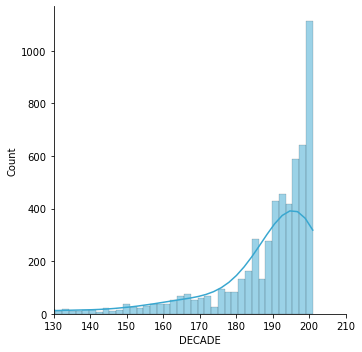

In [14]:
# The general earthquake count development from 1300 by decade 
# On the entire data set, including kde line
plt.figure(figsize=[40,15])
g = sns.displot(data=df, x="DECADE", kde=True, color = sns.color_palette("husl", 8)[5])  #, x ='mag', kde = True) # , *col=’row_z’ )
g.set(xlim=(130.0, 210.0))

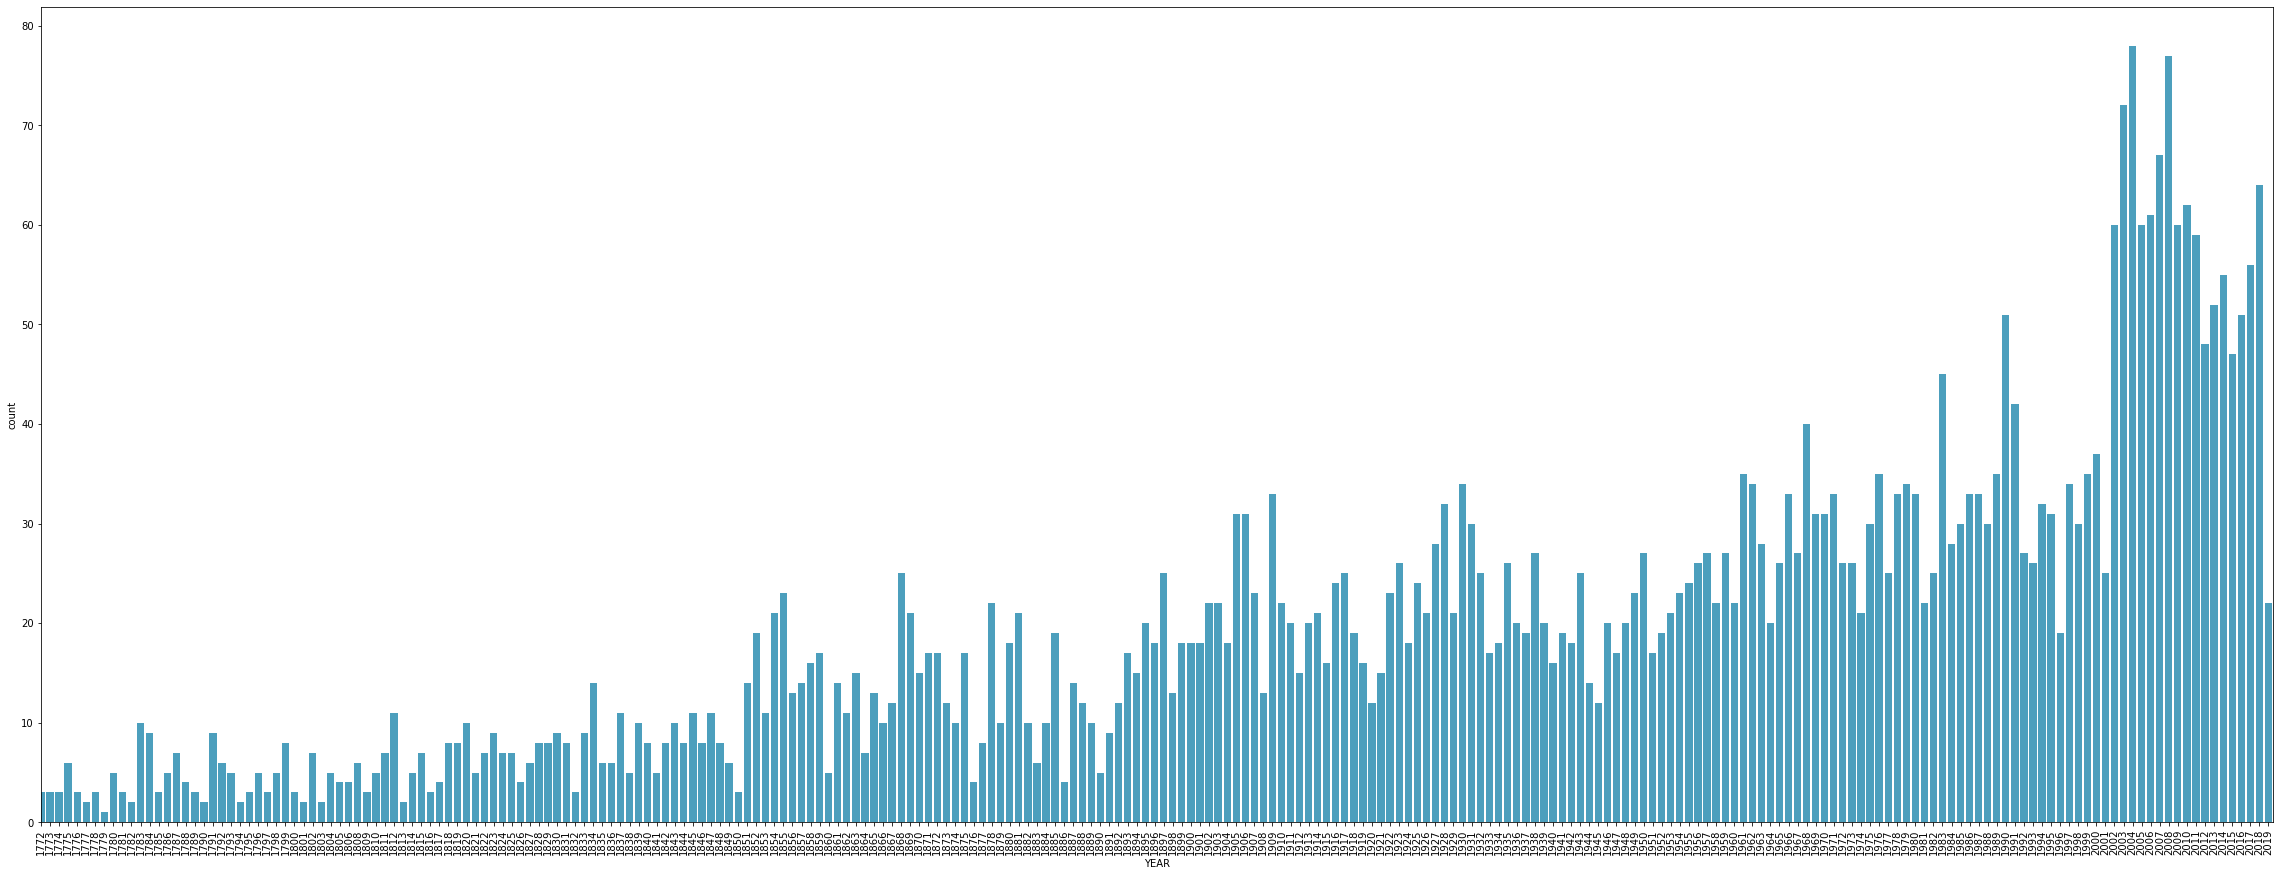

In [517]:
# The general earthquake count development from 1772 by year 
# On the entire data set
plt.figure(figsize=[40,15])

g = sns.countplot(data=df, x="YEAR", color = sns.color_palette("husl", 8)[5])
g.set(xlim=(700.0, None))
g.set_xticklabels(g.get_xticklabels(),rotation = 90);

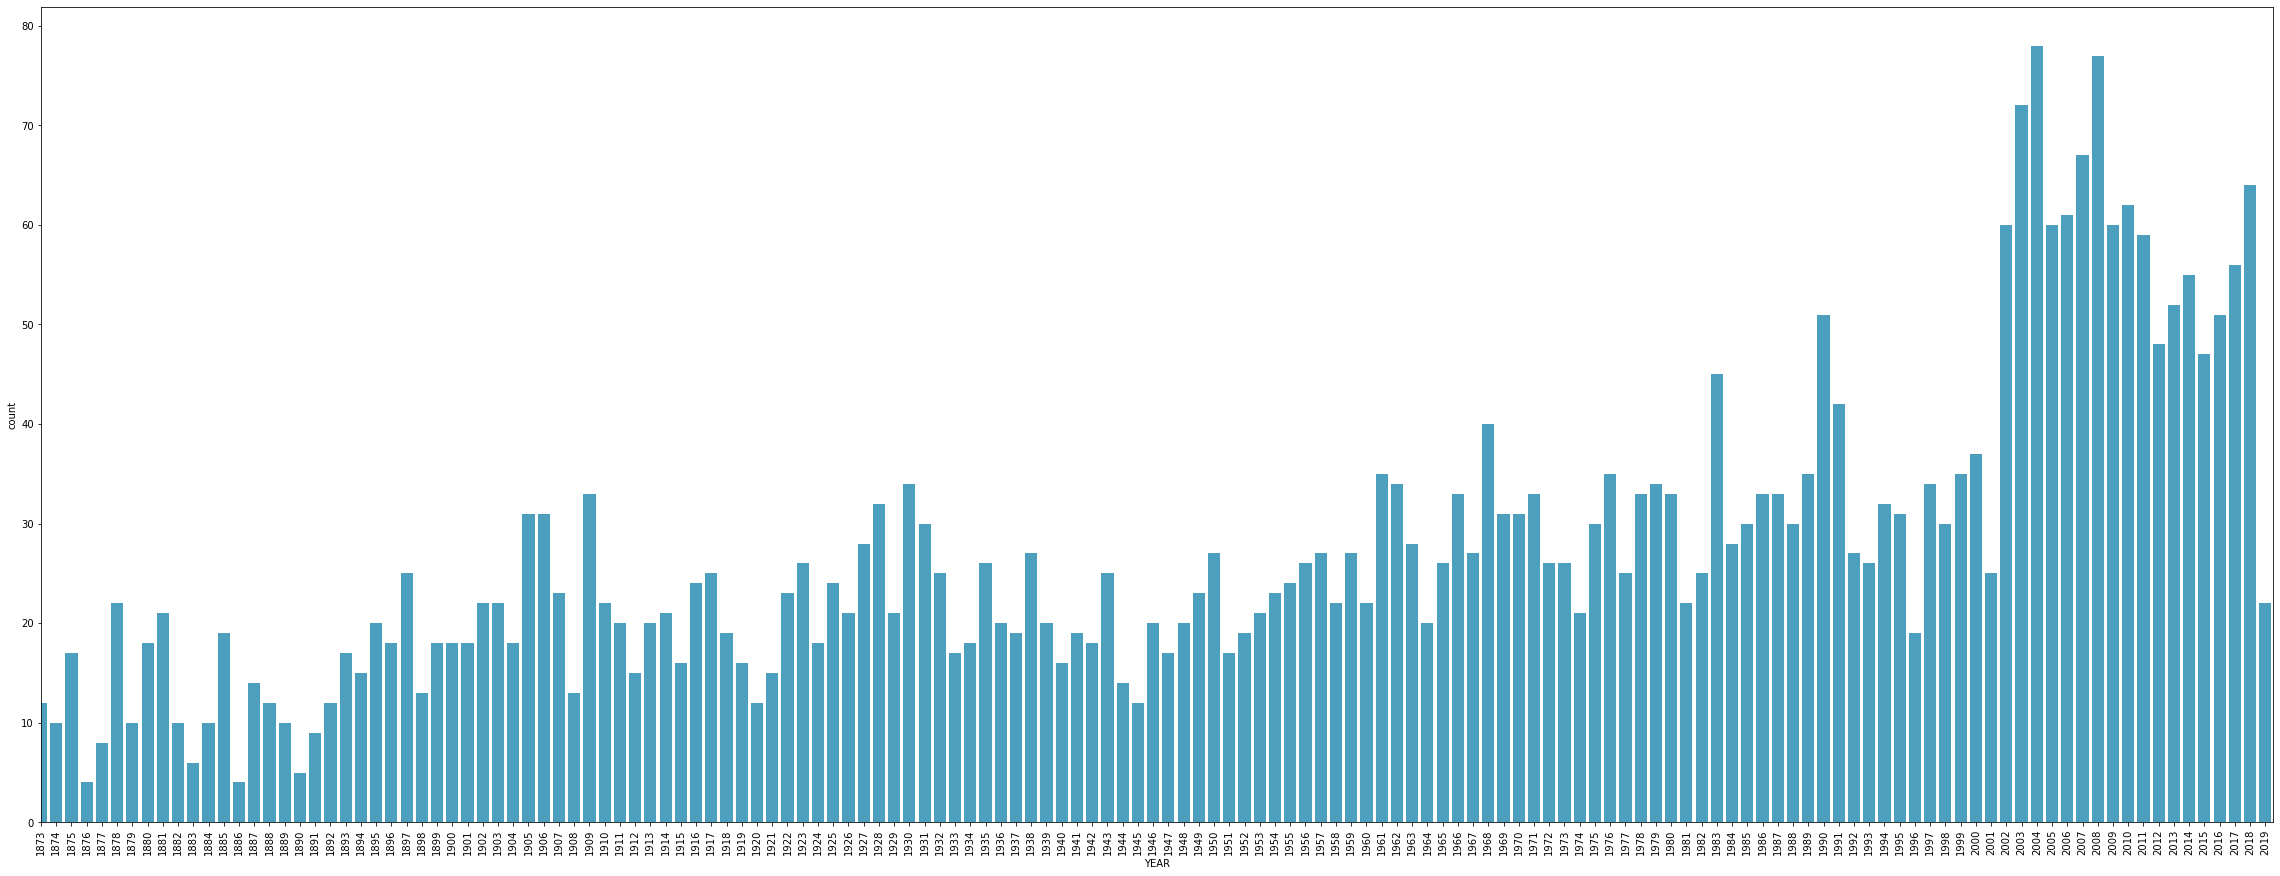

In [427]:
# The general earthquake count development from 1873 by year 
# On the entire data set
plt.figure(figsize=[40,15])
g = sns.countplot(data=df, x="YEAR", color = sns.color_palette("husl", 8)[5])
g.set(xlim=(800.0, None))
g.set_xticklabels(g.get_xticklabels(),rotation = 90);

Question 1 - Result: Without any other restrictions, it looks like there is a trend towards more and more earthquakes over time.

### Question 2a: Relationship between an Earthquakes Magnitude and its Damage 
Explore the correlation between magnitude and damage - the two columns associated with an earthquakes severity, as a lead up to analysing the development of severe earthquakes over time.

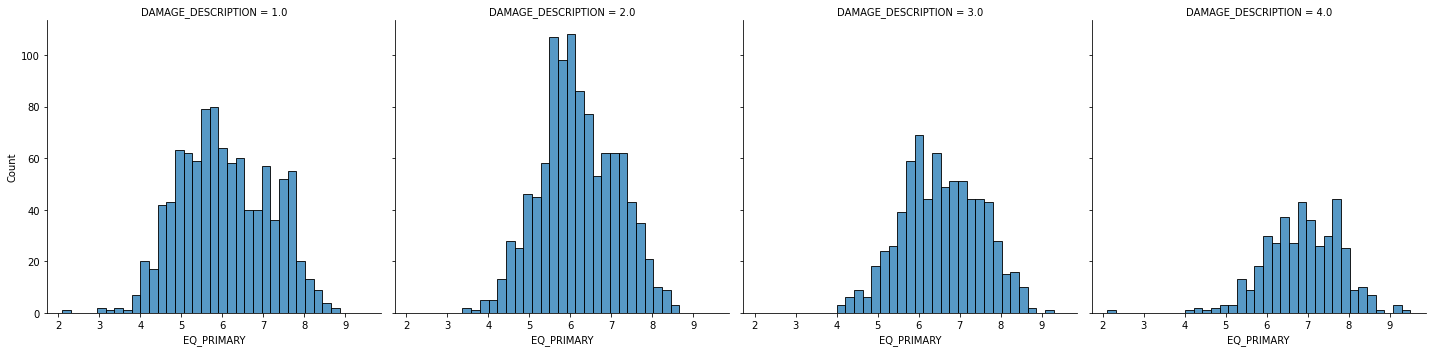

In [147]:
sns.displot(data=df_dropped, x='EQ_PRIMARY', col='DAMAGE_DESCRIPTION')

<Figure size 2880x1080 with 0 Axes>

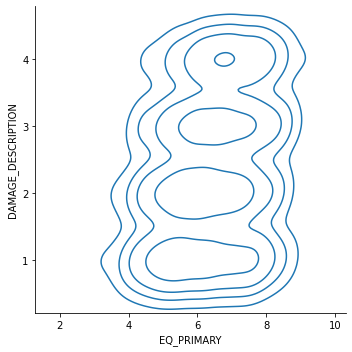

In [61]:
plt.figure(figsize=[40,15])

sns.displot(data=df_dropped, x='EQ_PRIMARY', y='DAMAGE_DESCRIPTION', kind='kde', levels=[.01, .04, .125, .5])

Question 2a - Result: 
* There is a tendency, that a higher damage description is associated to slightly higher earthquake magnitudes.
* However, this correlation appears to be much smaller than expected.

### Question 2b: Earthquake Development of Severe Earthquakes

<Figure size 2880x1080 with 0 Axes>

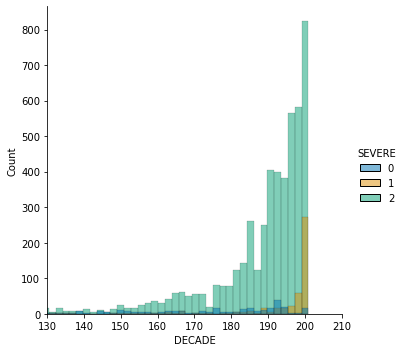

In [521]:
#Compare the development of earthquakes of different levels of severity
#As introduced in data preparation
plt.figure(figsize=[40,15])
g = sns.displot(data=df_lesser_cols, x="DECADE", hue="SEVERE",  palette=sns.color_palette("colorblind", 3))  #, x ='mag', kde = True) # , *col=’row_z’ )
g.set(xlim=(130.0, 210.0))

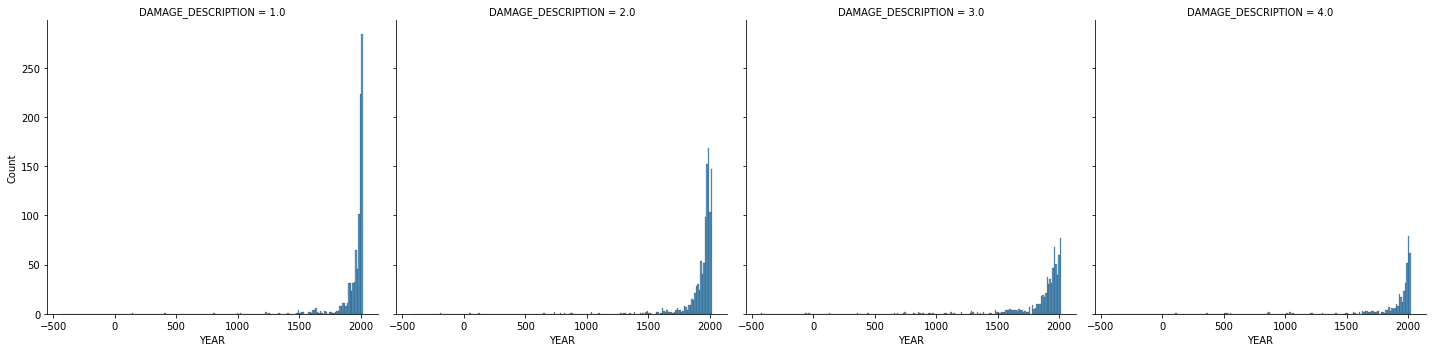

In [146]:
sns.displot(data=df_dropped, x='YEAR', col='DAMAGE_DESCRIPTION')

### Introducing some earthquake severity related dataframe sub-sets
To enable easier visualisations related to answering question 2b
#### df_dam4: All data with Damage Description == 4
#### df_EQGT5, -55, -6 , -65 , -7 , -8: All data points with a magnitude larger than 5, 5.5, 6, 6.5, 7, and 8 respectively 

In [433]:
df_dam4 = df_dropped[df_dropped['DAMAGE_DESCRIPTION']==4].copy()

In [434]:
print(df_dam4)

      YEAR  MONTH  EQ_PRIMARY    COUNTRY  LATITUDE LONGITUDE  REGION_CODE  \
73     115   12.0         7.5     TURKEY    36.100    36.100        140.0   
114    365    7.0         8.0     GREECE    35.000    23.000        130.0   
143    512    5.0         7.5      CHINA    39.400   113.300         30.0   
148    525    5.0         7.0     TURKEY    36.250    36.100        140.0   
150    528   11.0         7.1     TURKEY    36.250    36.100        140.0   
...    ...    ...         ...        ...       ...       ...          ...   
6056  2018    8.0         6.9  INDONESIA    -8.287   116.452         60.0   
6065  2018    9.0         6.6      JAPAN    42.671   141.933         30.0   
6070  2018    9.0         7.5  INDONESIA     -.178   119.840        170.0   
6077  2018   11.0         7.0        USA    61.340  -149.937        150.0   
6082  2018   12.0         5.1      ITALY    37.555    15.166        130.0   

      DAMAGE_DESCRIPTION  DECADE  CENTURY  TSUNAMI  SEVERE  
73            

In [435]:
df_EQGT5 = df_dropped[df_dropped['EQ_PRIMARY']>5.0].copy()
df_EQGT55 = df_dropped[df_dropped['EQ_PRIMARY']>5.5].copy()
df_EQGT6 = df_dropped[df_dropped['EQ_PRIMARY']>6.0].copy()
df_EQGT65 = df_dropped[df_dropped['EQ_PRIMARY']>6.5].copy()
df_EQGT7 = df_dropped[df_dropped['EQ_PRIMARY']>7.0].copy()
df_EQGT8 = df_dropped[df_dropped['EQ_PRIMARY']>8.0].copy()

In [436]:
print(df_EQGT7)

      YEAR  MONTH  EQ_PRIMARY           COUNTRY  LATITUDE LONGITUDE  \
16    -426    6.0         7.1            GREECE    38.900    22.700   
73     115   12.0         7.5            TURKEY    36.100    36.100   
114    365    7.0         8.0            GREECE    35.000    23.000   
129    447    1.0         7.3            TURKEY    40.900    28.500   
143    512    5.0         7.5             CHINA    39.400   113.300   
...    ...    ...         ...               ...       ...       ...   
6070  2018    9.0         7.5         INDONESIA     -.178   119.840   
6091  2019    2.0         7.5           ECUADOR    -2.199   -77.023   
6100  2019    5.0         7.2  PAPUA NEW GUINEA    -6.977   146.440   
6101  2019    5.0         7.5  PAPUA NEW GUINEA    -4.081   152.569   
6104  2019    5.0         8.0              PERU    -5.796   -75.298   

      REGION_CODE  DAMAGE_DESCRIPTION  DECADE  CENTURY  TSUNAMI  SEVERE  
16          130.0                 3.0     -43       -5        1       2  

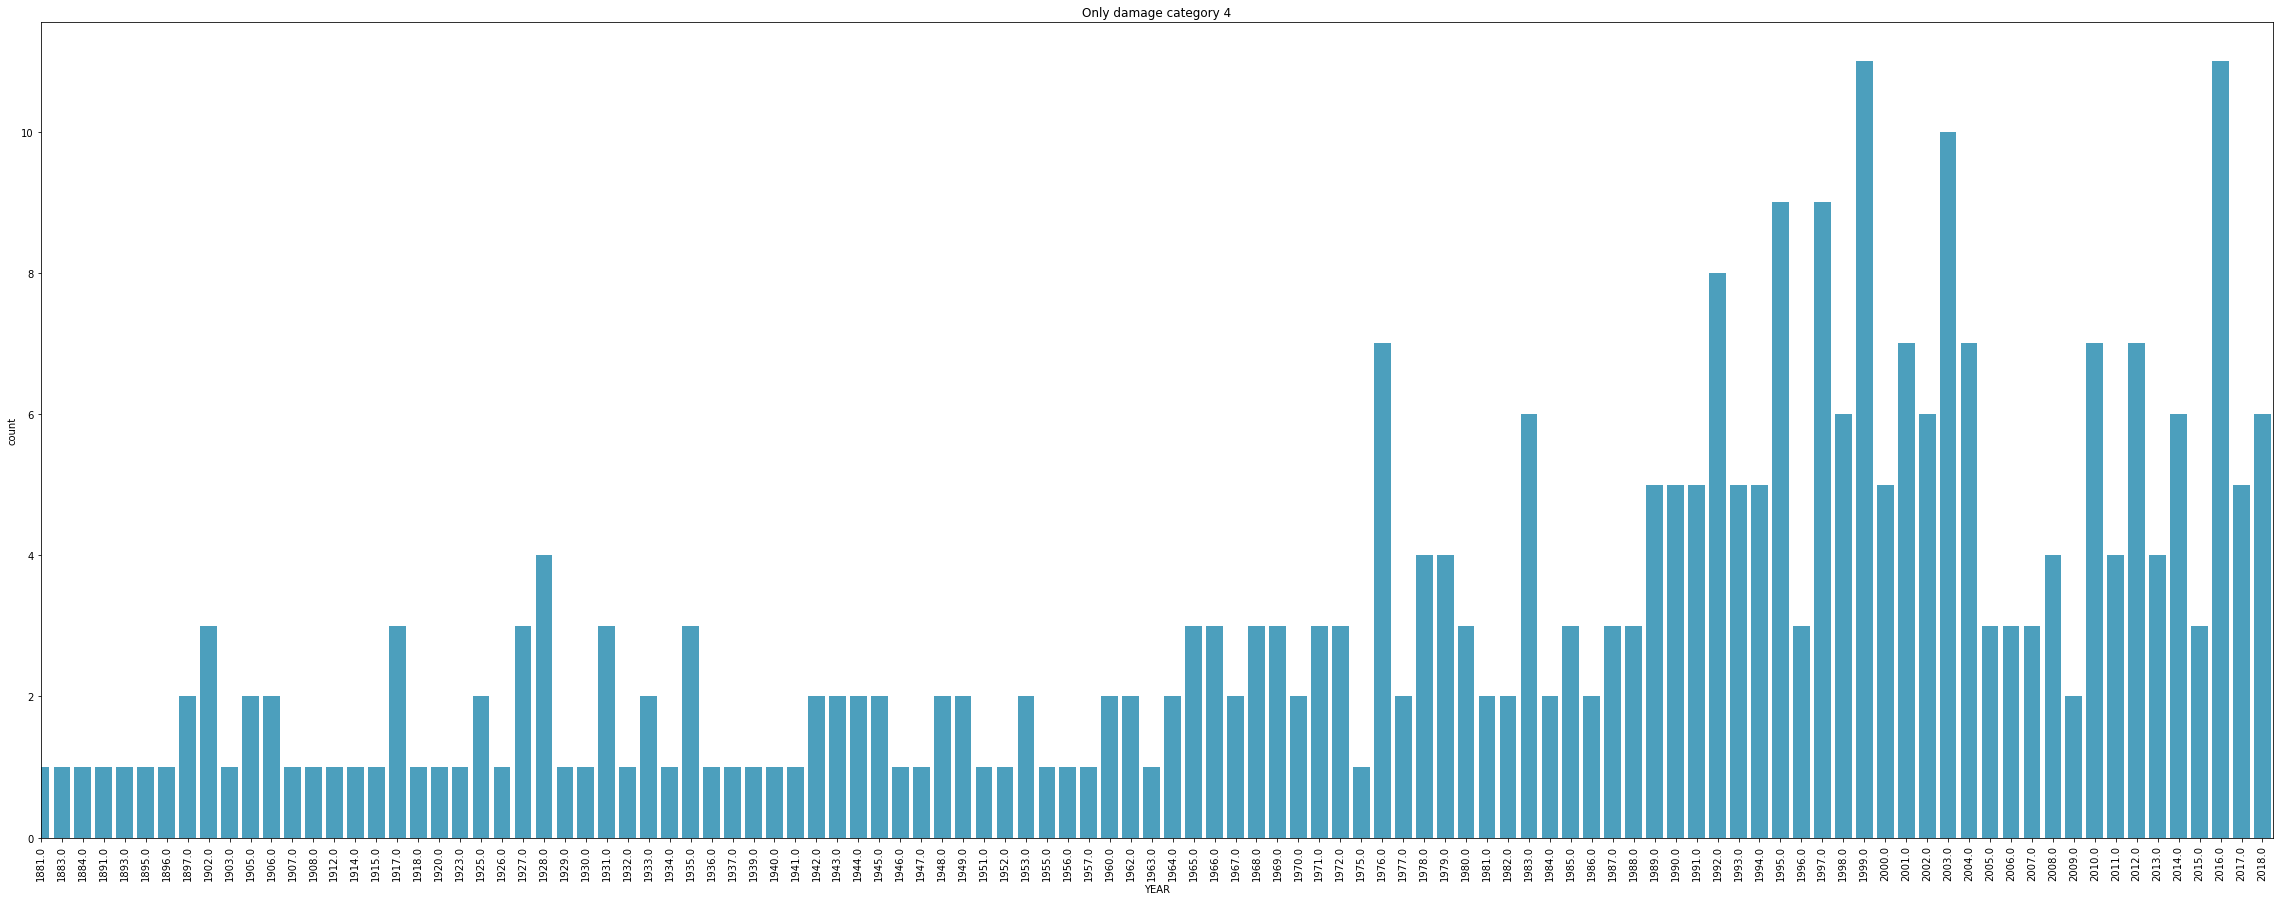

In [251]:
# The general earthquake count development from 1881 by year 
# Only on data with damage description == 4
plt.figure(figsize=[40,15])
g = sns.countplot(data=df_dam4, x="YEAR", color = sns.color_palette("husl", 8)[5])
g.set(xlim=(81.0, None))
g.set(title="Only damage category 4")
g.set_xticklabels(g.get_xticklabels(),rotation = 90);

<Figure size 2880x1080 with 0 Axes>

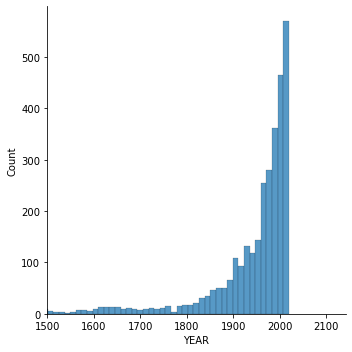

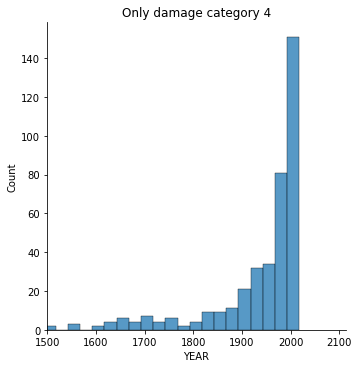

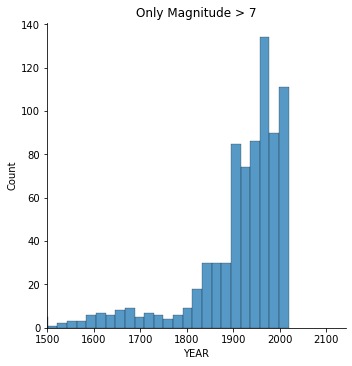

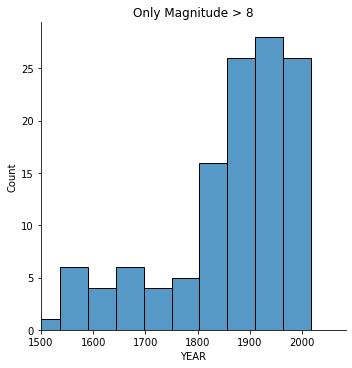

In [522]:
# Comparing graphs on the total data set
# vs. only data of certain magnitudes or induced damages

plt.figure(figsize=[40,15])

ax = sns.displot(data=df_dropped, x='YEAR')
ax.set(xlim=(1500.0, None))

ax = sns.displot(data=df_dam4, x='YEAR')
ax.set(xlim=(1500.0, None))
ax.set(title="Only damage category 4")

ax = sns.displot(data=df_EQGT7, x='YEAR')
ax.set(xlim=(1500.0, None))
ax.set(title="Only Magnitude > 7")

ax = sns.displot(data=df_EQGT8, x='YEAR')
ax.set(xlim=(1500.0, None))
ax.set(title="Only Magnitude > 8")

In [528]:
def hist_graph(df, kde=False):
    '''
    INPUT: 
    df  - the pandas dataframe to get the graph for
    kde - if True, the resulting histogram should include a kde line
          by default, kde is set to False
    
    OUTPUT:
    ploted figure of size 40x15, including a seaborn histogram of input
    dataframe df, on its "YEAR"-column. 
    The bins relate to decades between 1900 and 2020.    
    '''
        
    plt.figure(figsize=[40,15])

    ax = sns.histplot(data=df, x='YEAR', 
                      binwidth=10, binrange=(1900,2020), kde=kde,
                      color = sns.color_palette("husl", 8)[5])
    ax.set_xticks(np.arange(1900, 2020, 10))
    ax.set(xlim=(1900.0, 2020))

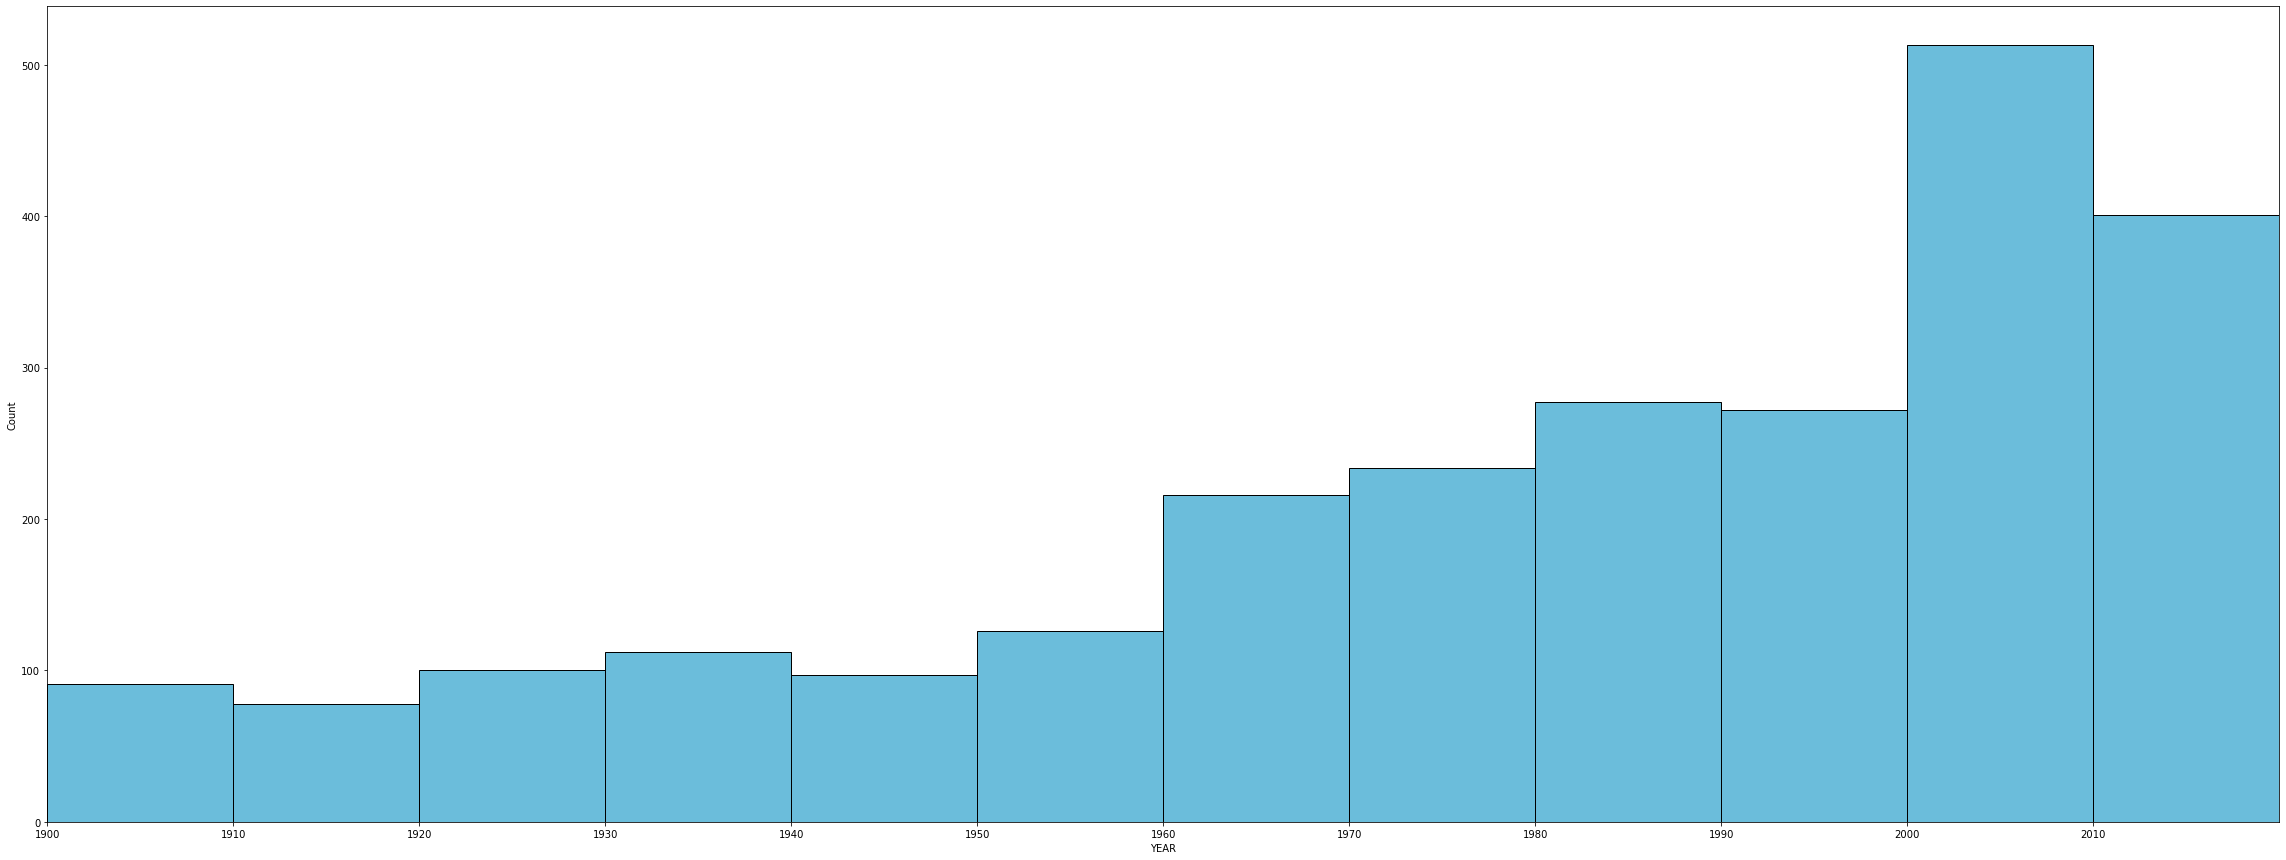

In [529]:
#Histogram of the earthquake development from 1900 onwards
#On the same reduced dataset that df_dam4 and df_EQGTs are based on 

hist_graph(df_dropped)

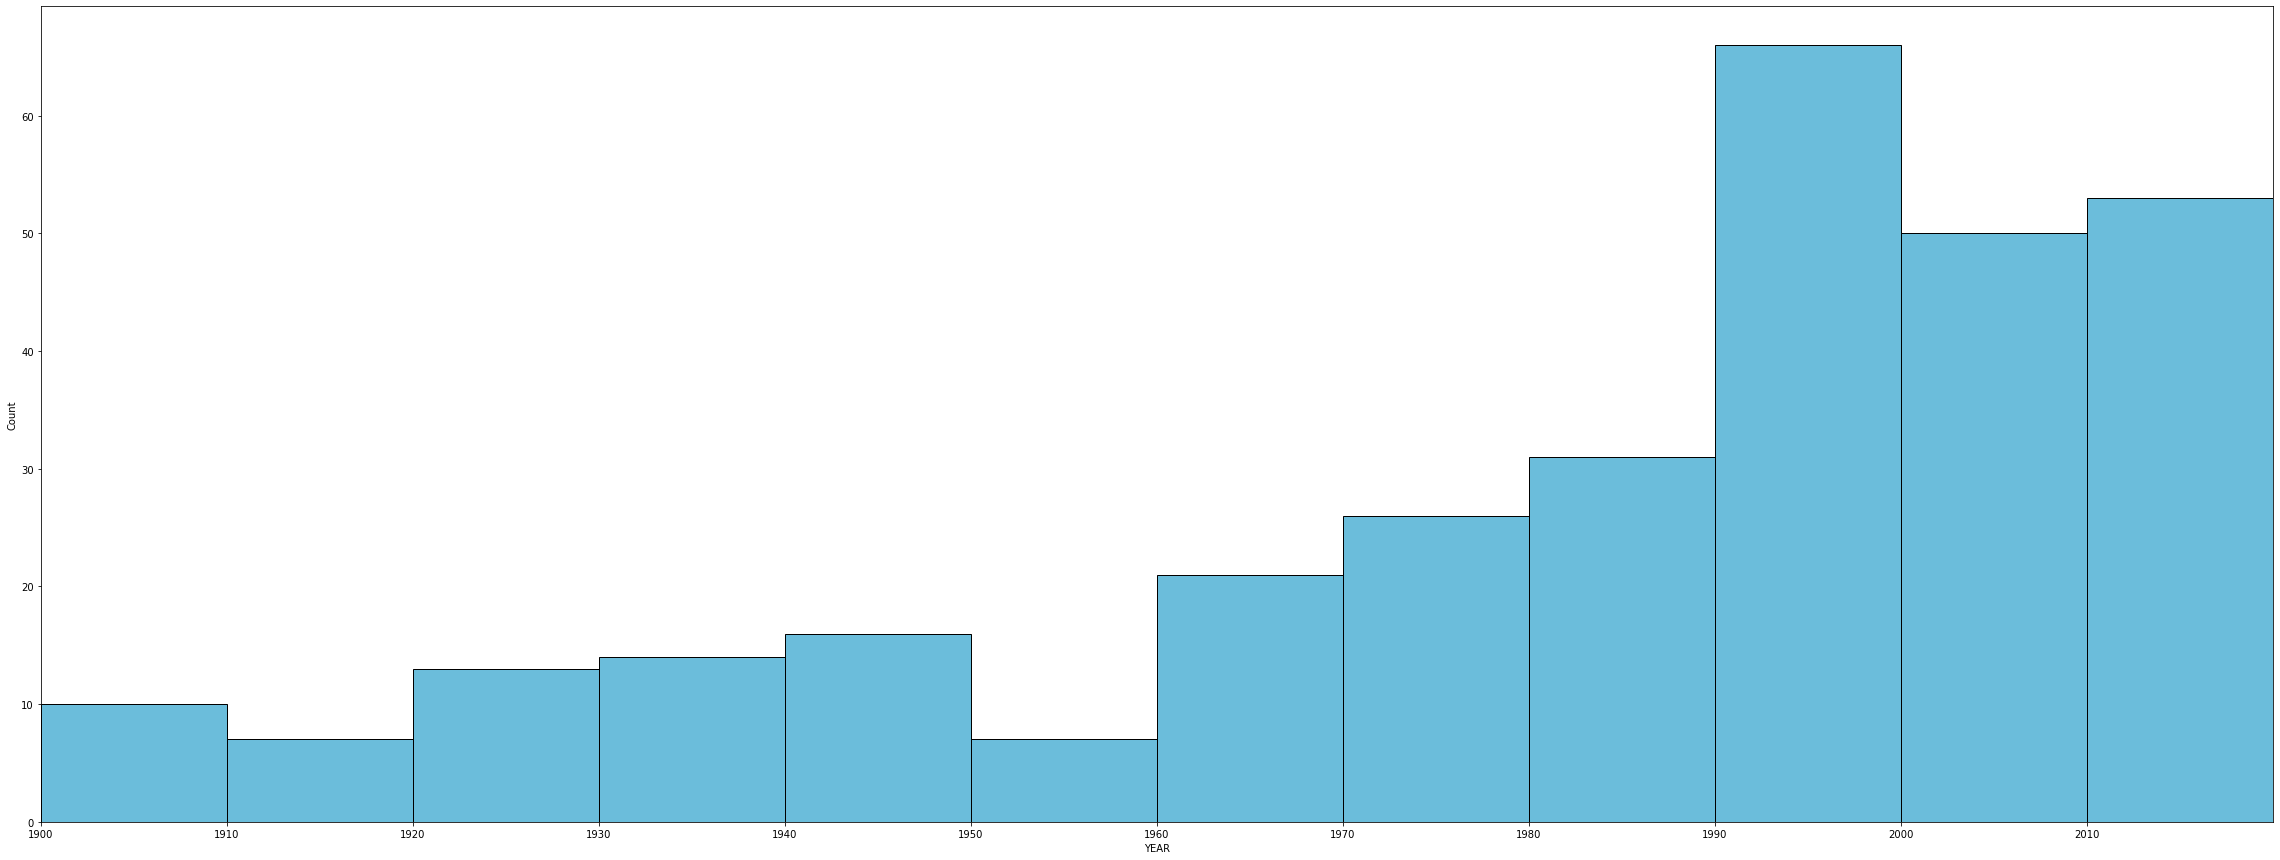

In [530]:
#Histogram of the earthquake development from 1900 onwards
#Only data, where data description == 4 (>$25 mio.) 

hist_graph(df_dam4)

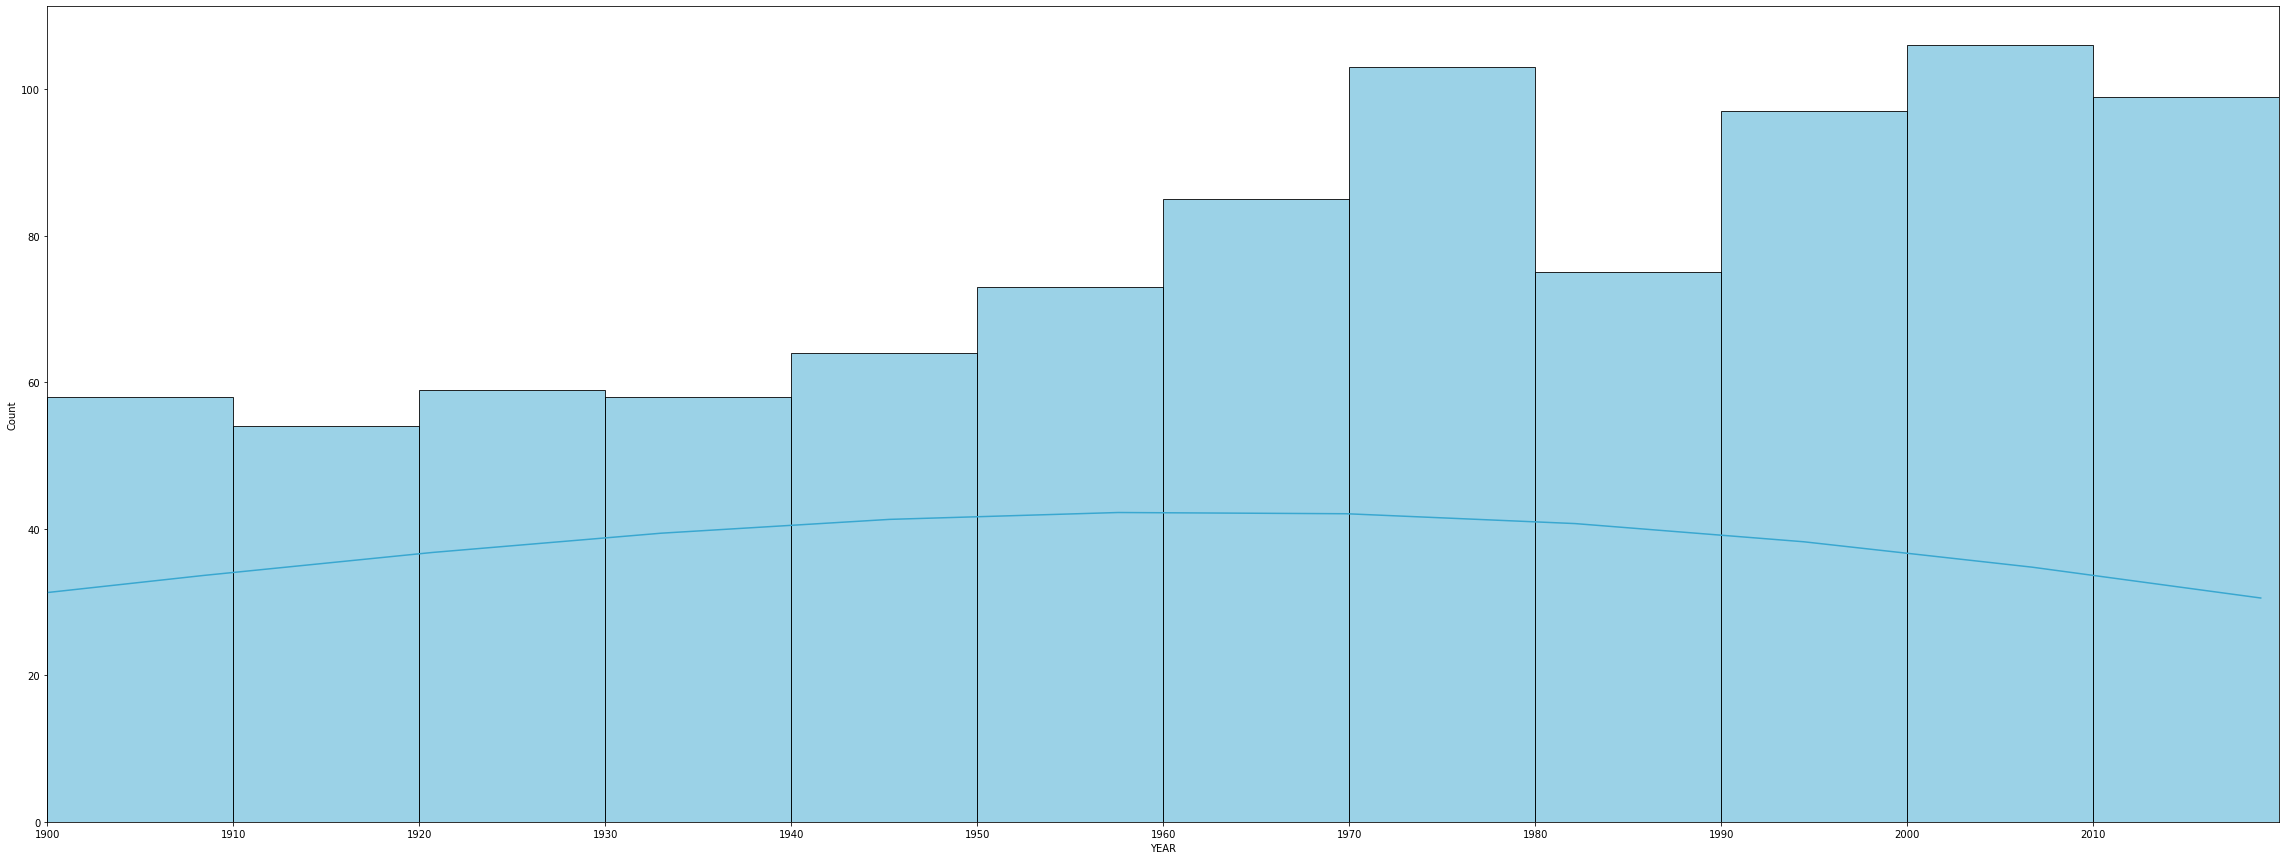

In [531]:
#Histogram of the earthquake development from 1900 onwards
#including a kde line
#Only data, where the respective magnitudes are greater than 6.5

hist_graph(df_EQGT65, kde=True)

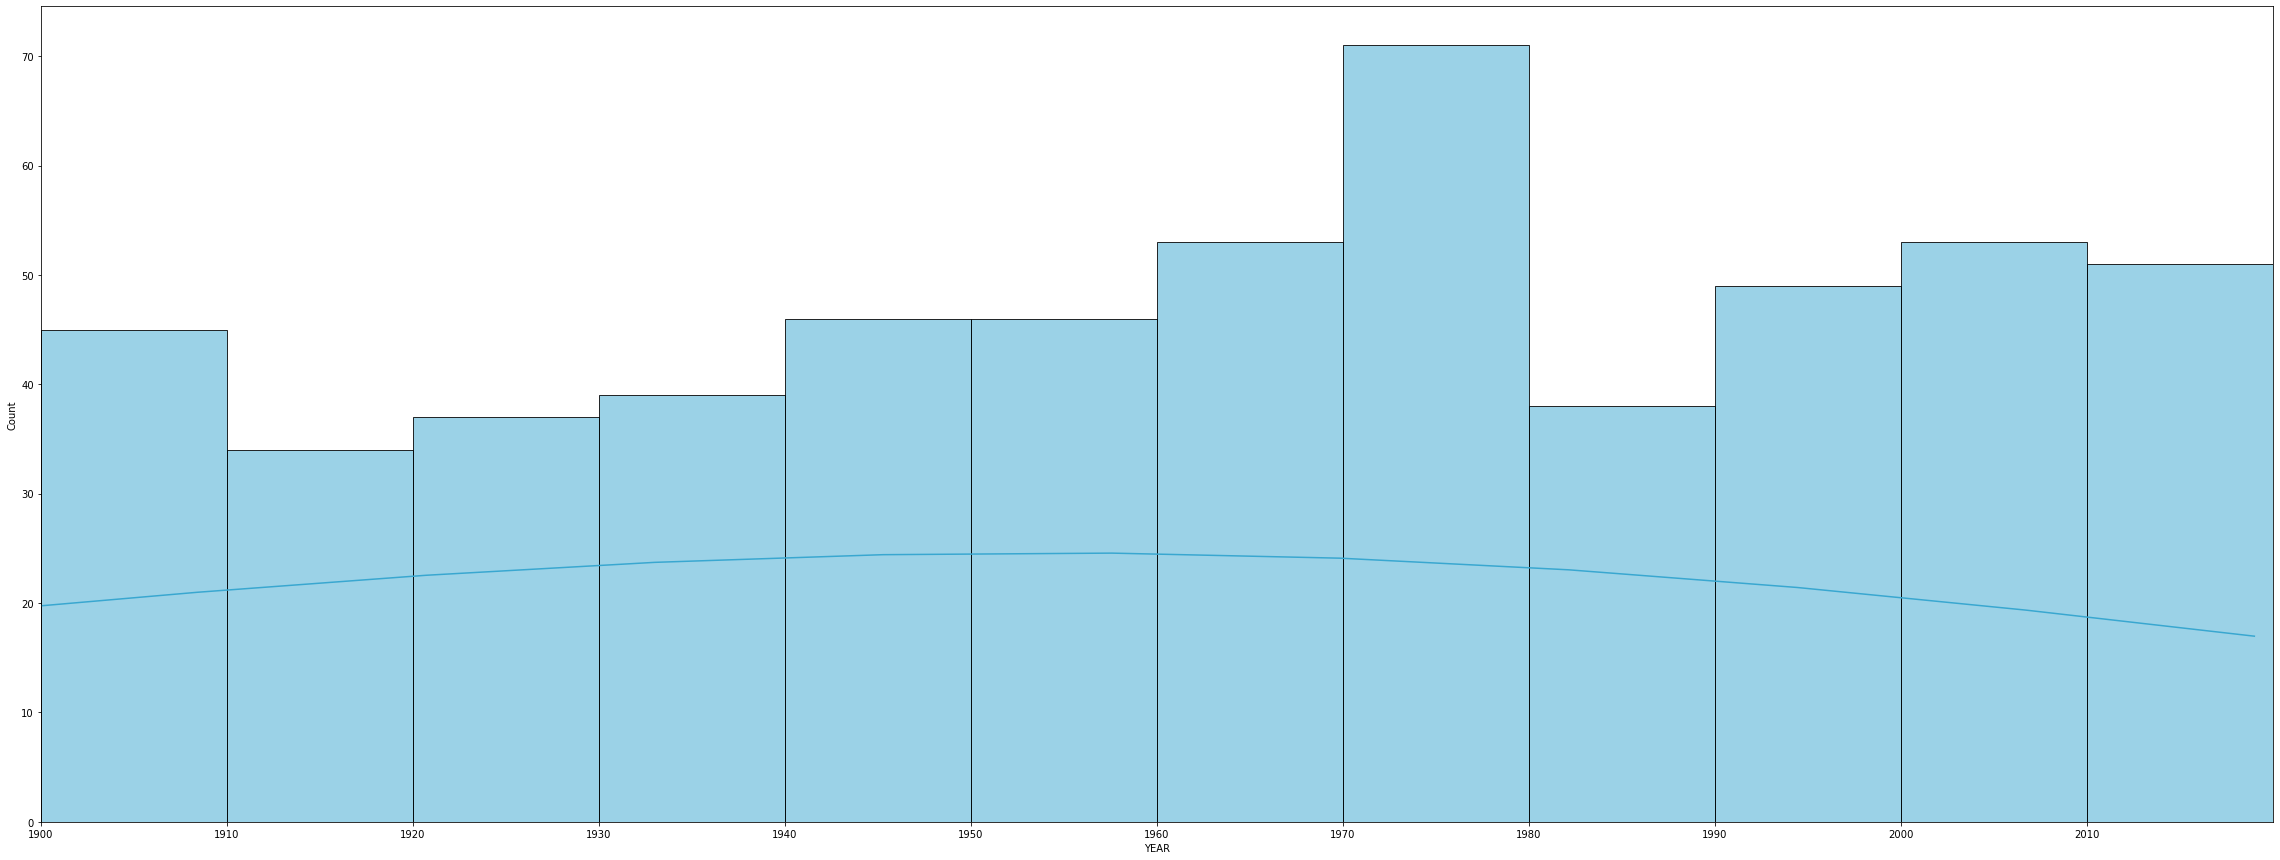

In [532]:
#Histogram of the earthquake development from 1900 onwards
#including a kde line
#Only data, where the respective magnitudes are greater than 7

hist_graph(df_EQGT7, kde=True)

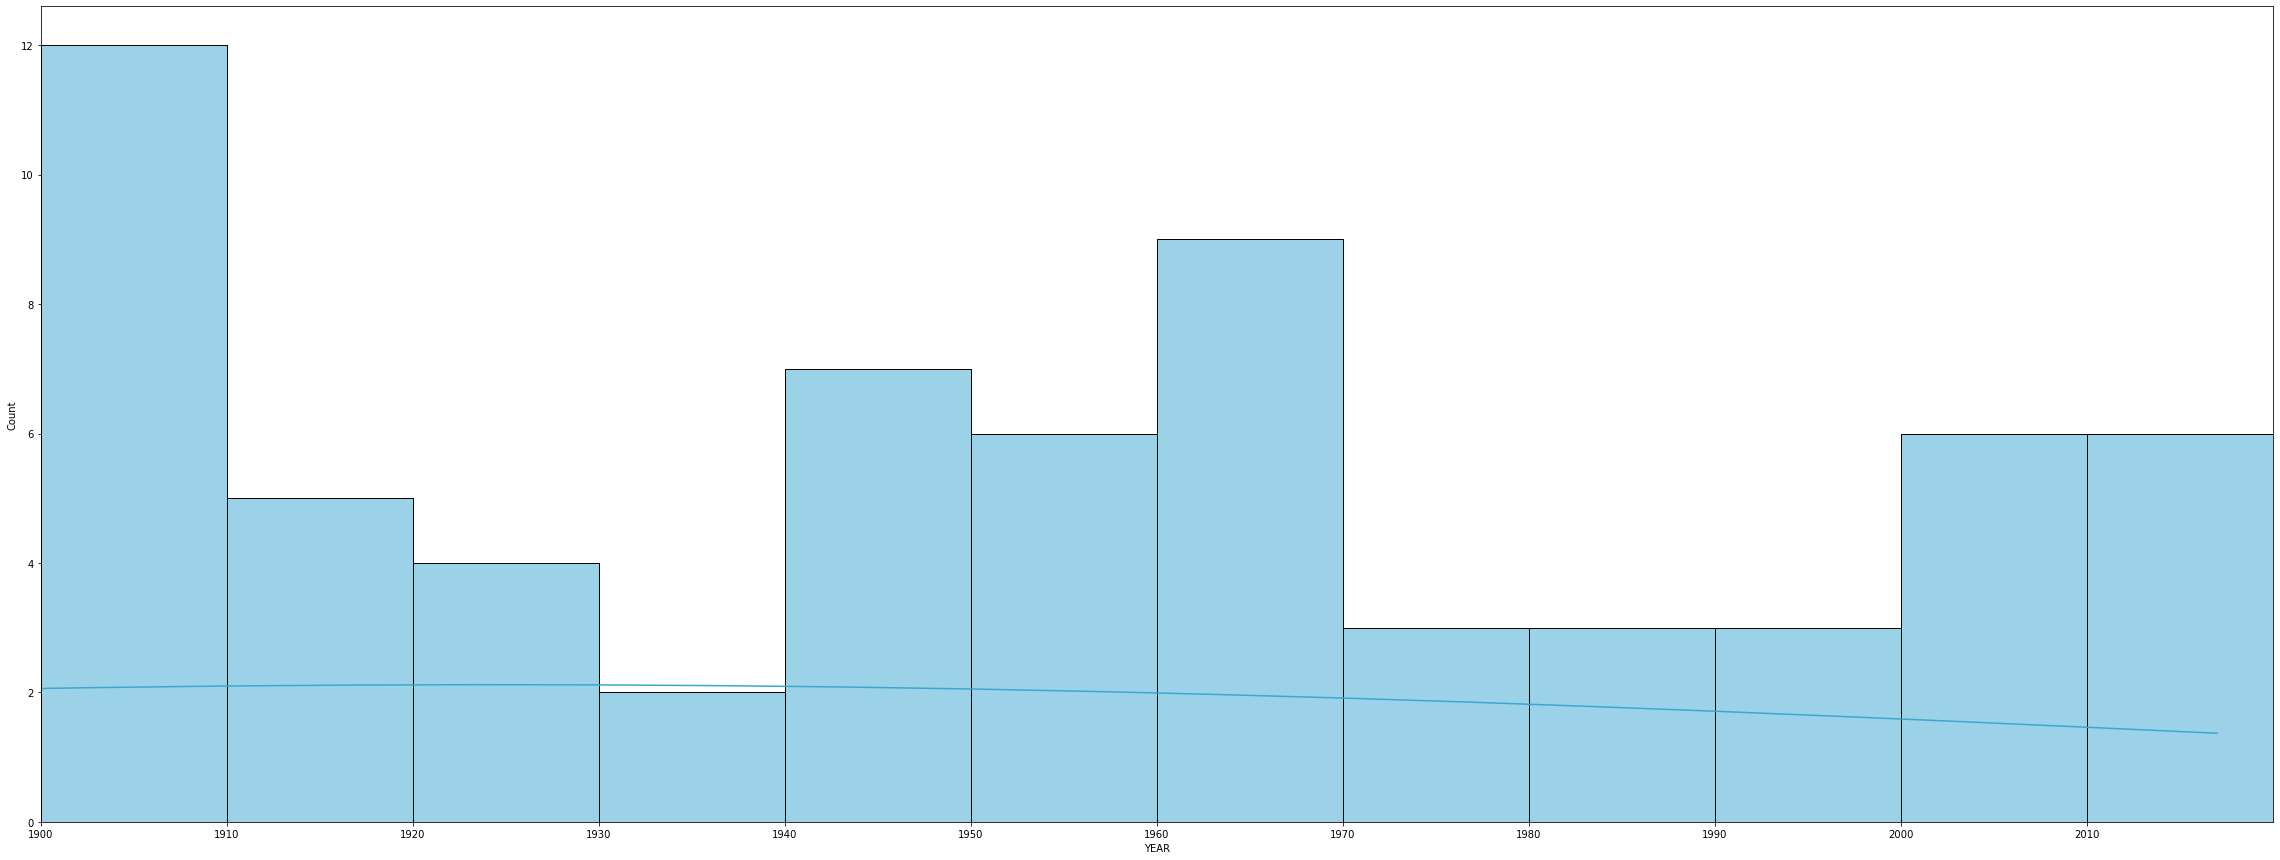

In [533]:
#Histogram of the earthquake development from 1900 onwards
#including a kde line
#Only data, where the respective magnitudes are greater than 8

hist_graph(df_EQGT8, kde=True)

Question 2b - Result: 
* The tendency towards more and more earthquakes over time seems very similar to the original dataset when only looking at earthquakes with a damage description of 4. This seems to correlate to the findings of Question 2a, where a higher damage description wasn't as closely linked to an earthquakes magnitude as one would probably expect.
* When considering only earthquakes of a magnitude of 7 or higher, there is no trend towards more and more earthquakes at all.


### Question 3: Geographical Distribution of Earthquakes
Some exploration here, as this is my first time working with these geographical data representations in python

In [439]:
country_vals = df['COUNTRY'].value_counts()
print(country_vals[:15])

CHINA               596
JAPAN               403
INDONESIA           382
IRAN                378
ITALY               326
TURKEY              322
GREECE              260
USA                 260
PHILIPPINES         211
MEXICO              200
CHILE               194
PERU                182
RUSSIA              149
PAPUA NEW GUINEA     97
TAIWAN               95
Name: COUNTRY, dtype: int64


<AxesSubplot:>

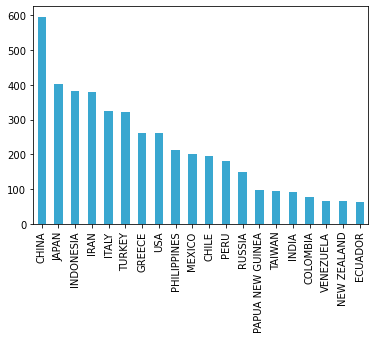

In [440]:
country_vals[:20].plot(kind="bar",
                  color = sns.color_palette("husl", 8)[5])

In [534]:
# To work with a geopandas.GeoDataFrame, it is best to first 
# have a longitude and latitude column of type float.
# That means that the values in the existing longitude and latitude 
# columns need to be cast from type string to type float.
# Before the type casting, the strings need to be stripped, 
# and in case of errors during type castings, those errors need to 
# be caught and dealt with by adding NaN values instead.

df_geo = df.dropna(subset=['LONGITUDE', 'LATITUDE'], axis=0, how='any').copy()

df_geo.LONGITUDE = df_geo.LONGITUDE.str.strip()
#print(df_geo.LONGITUDE)
df_geo.LATITUDE = df_geo.LATITUDE.str.strip()
#print(df_geo.LATITUDE)

values_lng=[]
values_lat=[]
for  val_lng, val_lat in zip(df_geo['LONGITUDE'], df_geo['LATITUDE']):
    try:
        print(val_lng, float(val_lng))
        values_lng.append(float(val_lng))
    except Exception: 
        values_lng.append(np.NaN)
    try:
        print(val_lat, float(val_lat))
        values_lat.append(float(val_lat))
    except Exception: 
        values_lat.append(np.NaN)

values_lng = pd.Series(values_lng)
df_geo['LONGITUDE'] = values_lng
values_lat = pd.Series(values_lat)
df_geo['LATITUDE'] = values_lat

df_geo = df_geo.dropna(subset=['LONGITUDE', 'LATITUDE']).copy()
print(df_geo.LONGITUDE, df_geo.LATITUDE)

35.500 35.5
31.100 31.1
58.200 58.2
38.000 38.0
35.800 35.8
35.683 35.683
25.400 25.4
36.400 36.4
35.300 35.3
31.500 31.5
25.500 25.5
35.500 35.5
35.800 35.8
35.683 35.683
35.500 35.5
32.000 32.0
35.000 35.0
29.600 29.6
35.500 35.5
33.000 33.0
35.220 35.22
33.270 33.27
22.500 22.5
37.000 37.0
35.370 35.37
33.560 33.56
23.500 23.5
37.900 37.9
23.300 23.3
39.700 39.7
22.500 22.5
37.000 37.0
22.700 22.7
38.900 38.9
51.800 51.8
35.500 35.5
22.250 22.25
38.250 38.25
25.000 25.0
35.000 35.0
25.000 25.0
40.000 40.0
71.000 71.0
23.000 23.0
22.500 22.5
38.500 38.5
27.000 27.0
41.000 41.0
77.500 77.5
42.700 42.7
28.300 28.3
36.300 36.3
25.500 25.5
29.200 29.2
-7.170 -7.17
36.200 36.2
8.500 8.5
44.300 44.3
-10.500 -10.5
36.000 36.0
25.396 25.396
36.404 36.404
103.900 103.9
35.400 35.4
105.600 105.6
33.800 33.8
119.000 119.0
36.300 36.3
36.600 36.6
45.200 45.2
-10.000 -10.0
36.000 36.0
19.500 19.5
41.300 41.3
41.000 41.0
43.000 43.0
28.500 28.5
43.500 43.5
104.700 104.7
34.900 34.9
34.200 34.2
31.

36.300 36.3
60.000 60.0
42.000 42.0
111.800 111.8
36.000 36.0
58.800 58.8
36.000 36.0
31.300 31.3
30.500 30.5
106.200 106.2
36.000 36.0
33.000 33.0
34.500 34.5
10.220 10.22
45.550 45.55
15.900 15.9
41.600 41.6
106.300 106.3
38.500 38.5
5.300 5.3
43.600 43.6
28.600 28.6
41.000 41.0
13.800 13.8
41.500 41.5
12.200 12.2
45.300 45.3
19.500 19.5
41.300 41.3
58.400 58.4
34.200 34.2
19.300 19.3
41.200 41.2
139.400 139.4
35.200 35.2
13.000 13.0
41.000 41.0
85.300 85.3
27.700 27.7
144.000 144.0
39.000 39.0
139.500 139.5
35.200 35.2
12.500 12.5
38.000 38.0
58.800 58.8
36.000 36.0
39.500 39.5
39.750 39.75
46.200 46.2
38.000 38.0
19.700 19.7
41.300 41.3
15.800 15.8
40.600 40.6
44.200 44.2
42.100 42.1
-6.100 -6.1
35.100 35.1
11.000 11.0
45.300 45.3
12.000 12.0
44.200 44.2
58.500 58.5
36.100 36.1
15.200 15.2
44.100 44.1
15.200 15.2
44.100 44.1
58.800 58.8
36.100 36.1
43.200 43.2
41.700 41.7
36.200 36.2
33.300 33.3
2.500 2.5
47.400 47.4
116.500 116.5
40.000 40.0
7.800 7.8
48.600 48.6
119.300 119.3
41.

7.600 7.6
16.283 16.283
39.033 39.033
16.750 16.75
39.250 39.25
50.000 50.0
36.200 36.2
18.100 18.1
42.500 42.5
13.300 13.3
42.600 42.6
-71.400 -71.4
-30.000 -30.0
46.300 46.3
38.200 38.2
-78.600 -78.6
-1.700 -1.7
5.700 5.7
50.800 50.8
16.530 16.53
38.570 38.57
140.680 140.68
42.070 42.07
117.000 117.0
23.000 23.0
15.500 15.5
45.900 45.9
121.700 121.7
18.200 18.2
-78.500 -78.5
-1.500 -1.5
46.100 46.1
38.000 38.0
-66.700 -66.7
10.900 10.9
116.500 116.5
23.500 23.5
22.700 22.7
42.300 42.3
111.100 111.1
35.100 35.1
140.600 140.6
35.200 35.2
129.500 129.5
35.500 35.5
-72.500 -72.5
7.500 7.5
8.000 8.0
43.000 43.0
-73.000 -73.0
7.600 7.6
140.100 140.1
39.400 39.4
-78.600 -78.6
-1.700 -1.7
121.000 121.0
14.400 14.4
121.000 121.0
14.400 14.4
43.200 43.2
38.300 38.3
28.980 28.98
41.040 41.04
10.317 10.317
43.550 43.55
15.800 15.8
41.900 41.9
141.700 141.7
37.700 37.7
-75.000 -75.0
-15.500 -15.5
-70.600 -70.6
-33.400 -33.4
140.000 140.0
36.000 36.0
43.200 43.2
38.300 38.3
14.900 14.9
45.000 45.0

44.100 44.1
44.500 44.5
33.000 33.0
52.300 52.3
29.400 29.4
132.000 132.0
32.300 32.3
20.800 20.8
38.800 38.8
105.500 105.5
51.800 51.8
9.500 9.5
46.900 46.9
20.650 20.65
38.717 38.717
142.000 142.0
38.600 38.6
-73.400 -73.4
18.500 18.5
99.900 99.9
24.600 24.6
120.980 120.98
14.600 14.6
102.000 102.0
-5.000 -5.0
121.000 121.0
14.200 14.2
124.300 124.3
24.000 24.0
-76.500 -76.5
17.600 17.6
20.000 20.0
39.500 39.5
142.700 142.7
39.300 39.3
4.800 4.8
44.400 44.4
-5.830 -5.83
35.800 35.8
-90.700 -90.7
14.600 14.6
-90.700 -90.7
14.600 14.6
8.700 8.7
46.900 46.9
-55.000 -55.0
47.000 47.0
-52.300 -52.3
4.900 4.9
-76.000 -76.0
19.900 19.9
-72.400 -72.4
19.000 19.0
128.200 128.2
-3.700 -3.7
15.900 15.9
46.000 46.0
-72.400 -72.4
19.000 19.0
-70.300 -70.3
9.200 9.2
-70.400 -70.4
19.000 19.0
-99.200 -99.2
16.700 16.7
120.600 120.6
23.500 23.5
-5.400 -5.4
35.500 35.5
-103.700 -103.7
20.300 20.3
51.300 51.3
33.600 33.6
27.000 27.0
38.500 38.5
51.300 51.3
33.900 33.9
46.700 46.7
38.000 38.0
46.200 46

105.200 105.2
37.500 37.5
-75.800 -75.8
20.000 20.0
41.300 41.3
39.900 39.9
120.500 120.5
14.000 14.0
98.000 98.0
1.500 1.5
128.200 128.2
-3.700 -3.7
129.750 129.75
-5.250 -5.25
-77.100 -77.1
-12.100 -12.1
-115.500 -115.5
32.500 32.5
-100.000 -100.0
17.000 17.0
-28.400 -28.4
38.300 38.3
130.500 130.5
-5.000 -5.0
121.100 121.1
13.800 13.8
-121.000 -121.0
35.500 35.5
139.500 139.5
35.500 35.5
15.200 15.2
40.900 40.9
52.500 52.5
29.600 29.6
15.200 15.2
40.800 40.8
-64.200 -64.2
10.500 10.5
23.500 23.5
38.250 38.25
127.600 127.6
26.200 26.2
154.000 154.0
47.000 47.0
-175.167 -175.167
-21.167 -21.167
123.000 123.0
14.000 14.0
-104.400 -104.4
24.000 24.0
128.600 128.6
-3.500 -3.5
-100.200 -100.2
19.800 19.8
-152.000 -152.0
57.000 57.0
16.300 16.3
39.300 39.3
-89.200 -89.2
13.800 13.8
-96.300 -96.3
17.000 17.0
-119.700 -119.7
34.400 34.4
11.800 11.8
44.300 44.3
136.000 136.0
35.000 35.0
-.100 -0.1
43.000 43.0
20.500 20.5
39.500 39.5
-83.000 -83.0
8.500 8.5
-83.000 -83.0
8.500 8.5
45.030 45.03

34.100 34.1
-70.400 -70.4
-23.700 -23.7
100.800 100.8
27.700 27.7
-166.400 -166.4
53.600 53.6
168.500 168.5
-19.000 -19.0
125.100 125.1
6.900 6.9
-88.400 -88.4
13.500 13.5
16.800 16.8
46.200 46.2
-3.300 -3.3
6.500 6.5
-67.200 -67.2
9.500 9.5
47.900 47.9
37.800 37.8
57.400 57.4
37.500 37.5
125.500 125.5
9.800 9.8
104.700 104.7
33.200 33.2
33.000 33.0
29.000 29.0
15.000 15.0
37.500 37.5
-118.433 -118.433
34.227 34.227
-89.100 -89.1
13.400 13.4
-83.000 -83.0
22.400 22.4
35.200 35.2
42.000 42.0
104.600 104.6
33.000 33.0
27.100 27.1
38.600 38.6
121.500 121.5
15.000 15.0
121.850 121.85
16.000 16.0
121.500 121.5
15.000 15.0
27.800 27.8
38.100 38.1
27.100 27.1
38.600 38.6
-71.180 -71.18
-31.620 -31.62
54.200 54.2
27.100 27.1
178.850 178.85
-38.850 -38.85
-155.600 -155.6
55.800 55.8
-136.000 -136.0
57.000 57.0
16.100 16.1
45.900 45.9
137.300 137.3
36.700 36.7
48.100 48.1
40.500 40.5
46.200 46.2
36.100 36.1
120.700 120.7
24.500 24.5
13.900 13.9
40.700 40.7
26.250 26.25
38.250 38.25
26.200 26.2
3

-4.000 -4.0
109.000 109.0
-22.000 -22.0
.300 0.3
6.500 6.5
-61.000 -61.0
15.000 15.0
85.000 85.0
43.500 43.5
-153.900 -153.9
56.850 56.85
-71.000 -71.0
-18.000 -18.0
94.500 94.5
2.000 2.0
-76.800 -76.8
18.200 18.2
13.700 13.7
38.000 38.0
-75.400 -75.4
-13.200 -13.2
122.000 122.0
3.000 3.0
-100.000 -100.0
17.000 17.0
123.000 123.0
14.000 14.0
123.000 123.0
13.500 13.5
153.700 153.7
-7.500 -7.5
147.000 147.0
51.500 51.5
120.000 120.0
18.000 18.0
127.000 127.0
1.000 1.0
121.000 121.0
-2.000 -2.0
20.100 20.1
41.100 41.1
-169.730 -169.73
52.590 52.59
-135.500 -135.5
59.500 59.5
-112.500 -112.5
28.000 28.0
67.900 67.9
38.500 38.5
16.017 16.017
38.133 38.133
-76.790 -76.79
-8.010 -8.01
123.000 123.0
14.000 14.0
142.500 142.5
-3.100 -3.1
-175.730 -175.73
-21.170 -21.17
100.000 100.0
-2.000 -2.0
-146.200 -146.2
61.000 61.0
126.000 126.0
9.000 9.0
129.000 129.0
-10.000 -10.0
-99.000 -99.0
18.000 18.0
-101.000 -101.0
17.000 17.0
123.000 123.0
3.000 3.0
-155.000 -155.0
19.000 19.0
70.500 70.5
36.5

14.200 14.2
45.800 45.8
13.100 13.1
42.900 42.9
142.000 142.0
34.200 34.2
120.500 120.5
23.000 23.0
34.500 34.5
44.400 44.4
34.300 34.3
44.400 44.4
13.500 13.5
41.900 41.9
-136.070 -136.07
57.690 57.69
9.600 9.6
44.500 44.5
-120.774 -120.774
34.813 34.813
9.600 9.6
44.500 44.5
-73.000 -73.0
-44.600 -44.6
11.800 11.8
45.800 45.8
102.500 102.5
25.200 25.2
119.700 119.7
-.700 -0.7
160.039 160.039
55.663 55.663
11.600 11.6
42.900 42.9
9.200 9.2
44.200 44.2
-125.000 -125.0
49.000 49.0
-97.600 -97.6
17.800 17.8
16.000 16.0
38.800 38.8
60.000 60.0
31.600 31.6
88.500 88.5
-2.500 -2.5
170.500 170.5
-22.000 -22.0
-96.100 -96.1
15.670 15.67
13.000 13.0
46.400 46.4
27.400 27.4
38.100 38.1
-69.500 -69.5
-13.000 -13.0
25.300 25.3
42.200 42.2
-97.100 -97.1
17.750 17.75
25.000 25.0
42.100 42.1
23.000 23.0
38.000 38.0
23.500 23.5
38.000 38.0
23.000 23.0
38.000 38.0
-69.500 -69.5
-13.000 -13.0
26.800 26.8
40.800 40.8
-78.000 -78.0
-5.000 -5.0
-174.345 -174.345
-19.800 -19.8
143.200 143.2
40.000 40.0
120

127.200 127.2
47.000 47.0
99.400 99.4
23.600 23.6
92.500 92.5
12.500 12.5
10.000 10.0
36.000 36.0
43.300 43.3
39.500 39.5
102.300 102.3
31.700 31.7
39.400 39.4
39.700 39.7
132.100 132.1
32.000 32.0
-18.983 -18.983
37.417 37.417
-83.200 -83.2
8.700 8.7
-84.000 -84.0
8.500 8.5
120.300 120.3
23.300 23.3
99.900 99.9
22.700 22.7
100.300 100.3
23.100 23.1
121.000 121.0
13.500 13.5
-81.500 -81.5
-.750 -0.75
-74.500 -74.5
4.600 4.6
124.000 124.0
-67.900 -67.9
-34.600 -34.6
122.000 122.0
43.000 43.0
-91.000 -91.0
14.000 14.0
-76.000 -76.0
-15.000 -15.0
20.400 20.4
41.700 41.7
32.000 32.0
-49.500 -49.5
-95.000 -95.0
16.300 16.3
28.200 28.2
39.200 39.2
34.600 34.6
40.300 40.3
35.000 35.0
40.600 40.6
35.100 35.1
40.800 40.8
36.500 36.5
40.900 40.9
17.200 17.2
43.400 43.4
30.500 30.5
40.800 40.8
17.000 17.0
44.300 44.3
-80.500 -80.5
-2.100 -2.1
-71.500 -71.5
-14.200 -14.2
-101.500 -101.5
16.700 16.7
73.300 73.3
39.300 39.3
-72.000 -72.0
-30.750 -30.75
4.500 4.5
36.100 36.1
13.300 13.3
43.100 43.1
1

55.000 55.0
-173.000 -173.0
-15.500 -15.5
107.100 107.1
-4.600 -4.6
52.500 52.5
33.400 33.4
28.500 28.5
36.000 36.0
28.700 28.7
36.400 36.4
30.900 30.9
40.700 40.7
112.500 112.5
38.000 38.0
137.000 137.0
-1.500 -1.5
116.400 116.4
56.200 56.2
52.700 52.7
36.100 36.1
-99.100 -99.1
16.500 16.5
-71.500 -71.5
-23.500 -23.5
53.300 53.3
28.300 28.3
127.500 127.5
5.500 5.5
107.300 107.3
-8.200 -8.2
-178.500 -178.5
-20.400 -20.4
116.000 116.0
-2.000 -2.0
-66.000 -66.0
-21.000 -21.0
99.500 99.5
45.500 45.5
47.800 47.8
34.300 34.3
166.700 166.7
-12.300 -12.3
-72.000 -72.0
-16.500 -16.5
53.000 53.0
36.500 36.5
-79.500 -79.5
1.500 1.5
-79.000 -79.0
2.000 2.0
104.000 104.0
31.500 31.5
125.000 125.0
25.000 25.0
104.000 104.0
-4.500 -4.5
-28.800 -28.8
38.500 38.5
-136.665 -136.665
58.370 58.37
-69.000 -69.0
-13.500 -13.5
47.900 47.9
34.400 34.4
-65.000 -65.0
-18.000 -18.0
-70.112 -70.112
-33.785 -33.785
156.400 156.4
49.300 49.3
49.000 49.0
36.000 36.0
109.500 109.5
22.500 22.5
112.500 112.5
-9.500 -9

-76.800 -76.8
-6.800 -6.8
52.800 52.8
28.400 28.4
121.600 121.6
23.600 23.6
120.300 120.3
13.400 13.4
-71.800 -71.8
-30.500 -30.5
124.300 124.3
3.900 3.9
13.300 13.3
43.800 43.8
69.700 69.7
36.200 36.2
50.800 50.8
30.100 30.1
-135.680 -135.68
56.820 56.82
152.900 152.9
-6.000 -6.0
73.400 73.4
36.000 36.0
-1.100 -1.1
46.000 46.0
22.400 22.4
37.900 37.9
20.300 20.3
38.300 38.3
168.800 168.8
-20.000 -20.0
126.600 126.6
6.500 6.5
140.700 140.7
33.300 33.3
-86.100 -86.1
12.400 12.4
-71.000 -71.0
-30.600 -30.6
-103.000 -103.0
18.480 18.48
100.580 100.58
31.400 31.4
176.570 176.57
-39.580 -39.58
-119.000 -119.0
34.100 34.1
52.620 52.62
28.580 28.58
156.600 156.6
50.500 50.5
150.270 150.27
-34.130 -34.13
122.800 122.8
13.400 13.4
43.030 43.03
11.660 11.66
-84.759 -84.759
10.679 10.679
-78.144 -78.144
4.956 4.956
-155.098 -155.098
19.936 19.936
145.800 145.8
43.200 43.2
146.400 146.4
43.300 43.3
146.600 146.6
43.200 43.2
86.480 86.48
35.180 35.18
15.167 15.167
37.660 37.66
-96.600 -96.6
18.270 

-1.639 -1.639
166.185 166.185
-13.987 -13.987
-85.838 -85.838
11.725 11.725
166.516 166.516
-13.966 -13.966
15.068 15.068
37.688 37.688
-77.512 -77.512
-9.505 -9.505
103.461 103.461
-3.904 -3.904
-92.072 -92.072
15.075 15.075
-71.785 -71.785
-13.410 -13.41
76.374 76.374
32.128 32.128
37.806 37.806
37.993 37.993
-174.776 -174.776
51.520 51.52
43.737 43.737
41.431 41.431
69.363 69.363
29.627 29.627
-174.504 -174.504
52.327 52.327
121.619 121.619
24.125 24.125
-62.928 -62.928
10.597 10.597
143.943 143.943
-4.448 -4.448
-116.610 -116.61
34.000 34.0
51.582 51.582
29.962 29.962
-117.869 -117.869
32.970 32.97
-69.428 -69.428
10.770 10.77
-118.447 -118.447
37.537 37.537
37.300 37.3
37.200 37.2
26.316 26.316
45.547 45.547
22.176 22.176
37.014 37.014
22.175 22.175
36.930 36.93
28.737 28.737
-30.546 -30.546
-89.118 -89.118
13.827 13.827
28.574 28.574
37.931 37.931
66.650 66.65
27.727 27.727
-176.367 -176.367
-28.117 -28.117
121.574 121.574
23.901 23.901
16.339 16.339
44.120 44.12
-35.769 -35.769


-65.431 -65.431
-17.731 -17.731
78.843 78.843
37.388 37.388
70.110 70.11
37.106 37.106
35.307 35.307
36.878 36.878
-28.626 -28.626
38.650 38.65
48.507 48.507
38.717 38.717
120.736 120.736
23.407 23.407
142.582 142.582
-2.943 -2.943
-80.393 -80.393
-.593 -0.593
77.343 77.343
39.660 39.66
112.413 112.413
-8.194 -8.194
20.080 20.08
44.209 44.209
20.390 20.39
41.925 41.925
47.225 47.225
33.199 33.199
53.608 53.608
27.791 27.791
101.029 101.029
27.308 27.308
124.891 124.891
-2.071 -2.071
104.021 104.021
26.373 26.373
-75.724 -75.724
4.461 4.461
46.954 46.954
42.962 42.962
-1.566 -1.566
38.193 38.193
69.364 69.364
34.259 34.259
57.193 57.193
28.343 28.343
114.658 114.658
41.131 41.131
79.403 79.403
30.512 30.512
-72.662 -72.662
-16.660 -16.66
51.880 51.88
29.501 29.501
47.448 47.448
40.802 40.802
-97.436 -97.436
18.386 18.386
-101.539 -101.539
18.324 18.324
-88.330 -88.33
15.782 15.782
91.895 91.895
21.544 21.544
29.970 29.97
40.760 40.76
29.949 29.949
40.711 40.711
23.605 23.605
38.119 38.1

128.283 128.283
2.520 2.52
118.777 118.777
-8.251 -8.251
7.600 7.6
47.580 47.58
98.916 98.916
18.901 18.901
99.859 99.859
.626 0.626
76.150 76.15
26.880 26.88
76.163 76.163
42.156 42.156
120.547 120.547
21.799 21.799
19.343 19.343
47.449 47.449
70.311 70.311
39.803 39.803
103.911 103.911
37.021 37.021
104.740 104.74
33.259 33.259
154.524 154.524
46.243 46.243
42.863 42.863
39.592 39.592
126.282 126.282
1.065 1.065
126.240 126.24
6.614 6.614
39.267 39.267
38.318 38.318
100.498 100.498
-.493 -0.493
-76.495 -76.495
2.082 2.082
48.930 48.93
33.490 33.49
169.357 169.357
-20.617 -20.617
136.588 136.588
37.336 37.336
20.420 20.42
38.340 38.34
157.043 157.043
-8.466 -8.466
-100.198 -100.198
17.302 17.302
136.239 136.239
34.807 34.807
19.897 19.897
41.172 41.172
-72.648 -72.648
-45.243 -45.243
1.009 1.009
51.085 51.085
-112.130 -112.13
45.394 45.394
100.746 100.746
20.504 20.504
127.343 127.343
-1.065 -1.065
101.052 101.052
23.028 23.028
-90.618 -90.618
13.554 13.554
50.833 50.833
34.437 34.437

38.244 38.244
-97.271 -97.271
35.937 35.937
82.586 82.586
35.905 35.905
121.332 121.332
-30.686 -30.686
131.825 131.825
33.684 33.684
-70.814 -70.814
-19.965 -19.965
-117.835 -117.835
33.863 33.863
-70.769 -70.769
-19.610 -19.61
-70.493 -70.493
-20.571 -20.571
103.619 103.619
28.174 28.174
-86.378 -86.378
12.403 12.403
155.049 155.049
-6.586 -6.586
162.148 162.148
-11.270 -11.27
162.051 162.051
-11.463 -11.463
-86.281 -86.281
12.151 12.151
-100.972 -100.972
17.397 17.397
155.024 155.024
-6.755 -6.755
99.670 99.67
19.656 19.656
-100.746 -100.746
17.235 17.235
68.358 68.358
26.387 26.387
8.690 8.69
49.799 49.799
19.777 19.777
41.115 41.115
25.330 25.33
40.240 40.24
97.845 97.845
25.000 25.0
-177.725 -177.725
-29.977 -29.977
178.735 178.735
51.849 51.849
-92.578 -92.578
14.728 14.728
142.453 142.453
37.005 37.005
-97.146 -97.146
35.524 35.524
-136.960 -136.96
58.306 58.306
-95.653 -95.653
17.682 17.682
3.301 3.301
36.841 36.841
103.409 103.409
27.189 27.189
26.705 26.705
-26.990 -26.99
-7

In [438]:
print(df['COUNTRY'])
print(df['LONGITUDE'])
print(df['LATITUDE'])

0                 JORDAN
1           TURKMENISTAN
2                  SYRIA
3                 GREECE
4                 ISRAEL
              ...       
6100    PAPUA NEW GUINEA
6101    PAPUA NEW GUINEA
6102               CHINA
6103         NETHERLANDS
6104                PERU
Name: COUNTRY, Length: 6105, dtype: object
0        35.500
1        58.200
2        35.800
3        25.400
4        35.300
         ...   
6100    146.440
6101    152.569
6102    124.611
6103      6.586
6104    -75.298
Name: LONGITUDE, Length: 6105, dtype: object
0       31.100
1       38.000
2       35.683
3       36.400
4       31.500
         ...  
6100    -6.977
6101    -4.081
6102    45.205
6103    53.394
6104    -5.796
Name: LATITUDE, Length: 6105, dtype: object


In [393]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [441]:
df_dropped['LATITUDE']

16      38.900
32      35.400
36      45.200
43      32.000
57      33.000
         ...  
6099    14.924
6100    -6.977
6101    -4.081
6102    45.205
6104    -5.796
Name: LATITUDE, Length: 3181, dtype: object

In [442]:
# geopandas.GeoDataFrame based on our earthquake dataset
# with longitude and latitude type = Float

geometry = [Point(xy) for xy in zip(df_geo['LONGITUDE'],df_geo['LATITUDE'])]
geo_df = gpd.GeoDataFrame(df_geo, geometry=geometry)

Text(0.5, 1.0, 'Earthquakes')

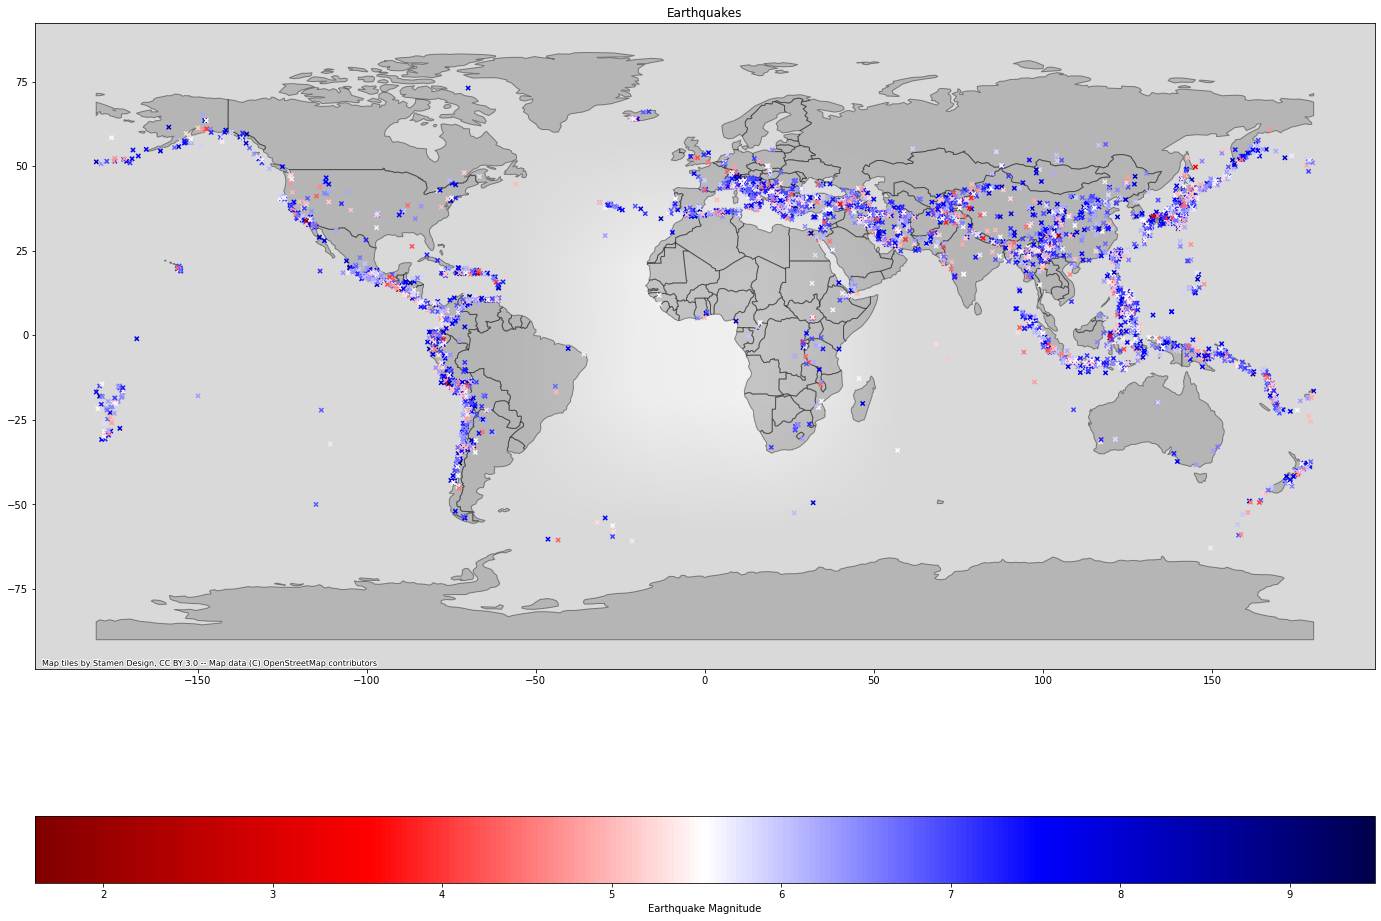

In [545]:
fig, ax = plt.subplots(figsize=(24,18))

# plot a world map using geopandas
world.plot(ax=ax, alpha=0.4, color='grey', edgecolor='black')
cx.add_basemap(ax, crs=geo_df.crs, zoom=12, source=cx.providers.Stamen.TonerLite)

# plot the earthquake locations on the map
geo_df.plot(column='EQ_PRIMARY', ax=ax, legend=True, cmap='seismic_r',
            markersize = 18, marker='x',
            legend_kwds={'label': "Earthquake Magnitude",
                         'orientation': "horizontal"})

plt.title('Earthquakes')

In [458]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [449]:
import plotly.express as px
import pandas as pd

fig = px.scatter_geo(geo_df, lat='LATITUDE', lon='LONGITUDE', hover_name="EQ_PRIMARY")
fig.update_layout(title = 'Earthquakes', title_x=0.5)
fig.show()

Question 3 - Result: 
* Certain countries and also geographical areas are much more prone to earthquakes than others